In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import random

### patienten data

In [2]:
patientdata = pd.read_csv("patientdata.csv")
patientdata

Unnamed: 0  subject_id   hadm_id            admittime  \
0                0    10000032  22595853  2180-05-06 22:23:00   
1                1    10000032  22841357  2180-06-26 18:27:00   
2                2    10000032  25742920  2180-08-05 23:44:00   
3                4    10000068  25022803  2160-03-03 23:16:00   
4                9    10000117  27988844  2183-09-18 18:10:00   
...            ...         ...       ...                  ...   
229444      431238    19999828  25744818  2149-01-08 16:44:00   
229445      431239    19999828  29734428  2147-07-18 16:23:00   
229446      431240    19999840  21033226  2164-09-10 13:47:00   
229447      431241    19999840  26071774  2164-07-25 00:27:00   
229448      431242    19999987  23865745  2145-11-02 21:38:00   

                  dischtime      admission_location       operation_date  \
0       2180-05-07 17:15:00  TRANSFER FROM HOSPITAL  2180-05-07 00:00:00   
1       2180-06-27 18:49:00          EMERGENCY ROOM  2180-06-27 00:00:00   
2       2180-08-07 17:50:00          EMERGENCY ROOM  2180-08-06 00:00:00   
3       2160-03-04 06:26:00          EMERGENCY ROOM  2160-03-03 00:00:00   
4       2183-09-21 16:30:00   WALK-IN/SELF REFERRAL  2183-09-19 00:00:00   
...                     ...                     ...                  ...   
229444  2149-01-18 17:00:00  TRANSFER FROM HOSPITAL  2149-01-08 00:00:00   
229445  2147-08-04 18:10:00      PHYSICIAN REFERRAL  2147-07-27 00:00:00   
229446  2164-09-17 13:42:00          EMERGENCY ROOM  2164-09-12 00:00:00   
229447  2164-07-28 12:15:00          EMERGENCY ROOM  2164-07-25 00:00:00   
229448  2145-11-11 12:57:00          EMERGENCY ROOM  2145-11-07 00:00:00   

       procedure_code  procedure_version diagnose_code  diagnose_version  \
0                5491                9.0          5723               9.0   
1                5491                9.0         07071               9.0   
2                5491                9.0         07054               9.0   
3                8938                9.0         30500               9.0   
4             0QS734Z               10.0       S72012A              10.0   
...               ...                ...           ...               ...   
229444        0J980ZZ               10.0       T8141XA              10.0   
229445        0HR7X74               10.0       T8131XA              10.0   
229446           9604                9.0          3453               9.0   
229447           8891                9.0         43491               9.0   
229448           8841                9.0           431               9.0   

         BMI      BMI_categorie blood_pressure blood_pressure_categorie  \
0       18.0       ondergewicht         110/65                  normaal   
1       18.0       ondergewicht         110/65                  normaal   
2       18.0       ondergewicht         110/65                  normaal   
3        NaN                NaN            NaN                      NaN   
4       19.6            normaal         124/66      verhoogde bloeddruk   
...      ...                ...            ...                      ...   
229444  25.7  licht overgewicht         130/88    stage1 hoge bloeddruk   
229445  25.7  licht overgewicht         130/88    stage1 hoge bloeddruk   
229446   NaN                NaN            NaN                      NaN   
229447   NaN                NaN            NaN                      NaN   
229448   NaN                NaN            NaN                      NaN   

        leeftijd  target  
0             52   False  
1             52   False  
2             52   False  
3             19   False  
4             48   False  
...          ...     ...  
229444        46    True  
229445        46    True  
229446        58    True  
229447        58    True  
229448        57    True  

[229449 rows x 17 columns]

In [3]:
# important column
columns = ['procedure_code', 'diagnose_code', 'BMI_categorie', 'blood_pressure_categorie', 'leeftijd']


### Analyse

In [47]:
filler = {columns[0]: [0], columns[1]: [0], columns[2]: [0], columns[3]: [0], columns[4]: [0]}
combi = pd.DataFrame(filler)
combi_count = {}

for index, row in patientdata.iterrows():

    done = (combi[columns] == row.loc[columns]).all(1).any()

    if done:
        print('dubbel')
        continue
    
    combi = combi.append(row.loc[columns], ignore_index=True)
    
    count = len(patientdata.where((patientdata['procedure_code']==row['procedure_code']) &
                                  (patientdata['diagnose_code']==row['diagnose_code']) &
                                  (patientdata['BMI_categorie']==row['BMI_categorie']) &
                                  (patientdata['blood_pressure_categorie']==row['blood_pressure_categorie']) &    
                                  (patientdata['leeftijd'].isin(range(row['leeftijd']-5, row['leeftijd']+5)))).dropna())
    

    print('new')
    print(count)
     

    combi_count[index] = count

new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
5
new
11
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
14
new
0
new
0
new
0
new
2
dubbel
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
0
new
1
new
1
new
5
new
10
new
1
new
7
new
11
new
3
new
6
new
4
new
1
new
1
new
2
new
2
new
1
new
13
new
6
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
6
new
6
new
8
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
96
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
6
new
0
new
1
new
1
new
2
new
0
new
1
new
2
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
11
new
1
new
1
new
1
new
2
new
1
new
1
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
6
new
0
new
7
new
17
new
3
new
1
new
0
new
0
new
0
new
2
new
2
new
0
new
4
new
1
new
6
new
7
new
44
new
8
new
1
new
1
new
1
new
1

new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
0
new
1
new
10
new
0
new
0
new
0
new
0
new
0
new
3
new
2
new
12
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
25
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
1
new
2
new
0
new
0
new
1
new
1
new
0
new
4
new
1
new
6
new
1
new
1
new
1
new
63
dubbel
new
1
new
0
new
2
new
1
new
2
new
1
new
1
new
4
new
0
new
0
new
19
new
6
new
1
new
0
new
1
new
0
new
0
new
0
new
7
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
6
new
1
new
1
new
1
new
2
new
2
new
2
new
1
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
6
new
6
new
6
new
16
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
3
new
2
new
1
new
1
new
0
new
0
new
1
new
36
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
ne

new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
2
new
1
new
1
new
3
new
1
dubbel
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
6
new
1
new
2
new
15
new
2
new
1
new
1
new
4
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
3
new
0
new
1
new
1
new
1
new
1
new
2
new
3
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
22
dubbel
dubbel
new
1
dubbel
dubbel
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
4
new
1
new
1
new
3
new
1
new
2
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
3
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
9
new
1
new
2
new
3
new
2
new
2
new
2
dubbel
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
15
new
1
new
2
new
1
new
8
new
0
new
0
new
1
n

new
0
new
0
new
0
new
0
new
6
new
1
new
14
new
2
new
1
new
1
new
1
new
0
new
1
new
1
new
2
new
1
new
3
new
1
new
2
new
2
new
3
new
59
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
3
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
5
new
0
new
0
new
5
new
25
new
1
new
1
new
1
new
1
new
1
new
4
new
0
new
1
new
1
new
1
new
4
new
1
new
2
new
1
new
0
new
1
new
0
new
1
new
1
new
9
new
2
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
3
new
0
new
27
new
4
new
1
new
0
new
0
new
1
new
2
new
8
dubbel
new
0
new
1
new
1
new
0
new
2
new
0
new
0
new
0
new
5
new
7
new
0
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
26
new
0
new
0
new
0
new
1
new
0
new
14
new
1
new
3
new
0
new
2
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
4
new
8
new
1
new
1
new
3
new
1
new
1
new
1
new
0
new

new
14
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
2
new
1
new
9
new
1
new
13
new
3
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
2
dubbel
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
2
new
1
new
1
new
0
new
2
new
1
new
1
new
94
new
1
new
1
new
6
new
0
new
2
new
1
new
1
new
1
new
1
new
6
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
4
new
1
new
16
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
0
new
1
new
0
new
5
new
3
new
2
new
1
new
7
new
1
new
2
new
1
new
3
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
4
new
0
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
8
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
6
new
5
new
1
new
7
new
1
new
2
new
0
new
0
new
0
new
0
new
4
new
0
dubbel
new
1
new
3
new
1
new
0
new
4
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
5
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new


new
1
new
4
dubbel
new
1
new
0
new
0
new
2
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
5
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
0
new
4
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
25
new
3
new
1
new
1
new
3
new
4
new
3
new
1
new
3
new
10
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
0
new
3
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
17
new
1
new
3
dubbel
new
0
new
0
new
0
new
0
new
0
new
7
new
1
new
0
new
0
new
1
new
17
new
0
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
0
new
2
new
1
new
3
new
3
new
1
new


new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
2
new
1
dubbel
new
3
new
1
new
1
new
3
new
0
new
2
new
1
new
3
new
1
new
1
new
8
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
3
new
5
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
16
new
0
new
0
new
4
new
1
new
0
new
1
new
0
new
0
new
2
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
4
new
3
new
1
new
1
new
2
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
3
new
1
new
1
new
1
new
6
new
0
dubbel
new
1
new
1
new
0
new
3
new
1
new
2
new
1
dubbel
new
8
new
0
new
0
new
0
new
1
new
1
new
7
dubbel
new
1
new
1
new
6
new
0
new
0
new
1
new
0
new
5
new
0
new
0
dubbel
new
3
dubbel
new
6
new
0
new
0
new
3
new
0
new
0
new
0
new
3
new
1
new
1
new
19
new
10
new
1
new
0
new
0
new
0
new
1
new
1
new
1
n

new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
45
new
14
new
1
new
1
new
1
new
0
new
0
new
1
new
2
dubbel
new
0
new
1
new
1
new
3
new
1
new
1
new
1
new
4
new
6
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
6
new
1
new
1
new
2
new
20
new
0
new
0
new
0
new
0
new
2
new
1
new
3
new
1
new
0
new
0
new
68
new
2
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
0
new
0
new
1
new
2
new
0
new
0
new
0
new
1
new
12
new
8
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
10
new
0
new
0
new
13
new
5
new
0
new
0
new
0
new
0
new
0
new
0
new
9
new
47
new
0
new
2
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
4
new
1
new
15
new
12
new
5
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
5
new
1
new
5
new
2
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
11
new
0
new
1
new
40
new
0
new
4
new
1
new
0
new
8
new
1
new
1
new
9
new
1
new
1
new
1
ne

new
0
new
1
new
3
new
17
new
14
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
4
new
17
dubbel
new
1
dubbel
new
1
new
1
dubbel
new
1
new
1
new
0
new
4
new
1
new
4
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
6
new
14
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
10
new
1
new
1
new
3
new
4
new
0
new
2
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
16
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
25
new
2
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
1
new
3
new
14
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
5
new
0
new
1
new
4
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1

new
1
dubbel
dubbel
dubbel
dubbel
new
1
dubbel
dubbel
dubbel
new
3
new
0
new
1
new
4
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
13
new
1
dubbel
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
2
dubbel
new
3
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
11
new
1
new
2
new
1
new
1
new
1
new
11
new
1
new
1
new
1
new
0
new
2
new
2
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
12
new
1
new
2
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
2
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
dubbel
dubbel
new
1
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
2
new
1
dubbel
new
0
new
2
new
1
new
1
new
5
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
1
new
1
new
1
new
0
new
36
new
0
new
0
new
0
new
0
new
0
new
4

new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
25
dubbel
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
8
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
0
new
3
new
2
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
2
new
0
new
1
new
1
new
1
new
1
new
2
dubbel
new
0
new
1
new
1
new
4
new
1
new
0
new
40
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
1
dubbel
new
4
new
0
new
0
new
12
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
0
new
2
dubbel
new
2
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
0
new
1
new
0
new
1
new
62
new
1
new
5
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
12
new
2
new
3
new
1
new
1
dubbel
new
2
new
1
new
1
new
1
dubbel
dubbel
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
0
new
1
new
1
new
1
new
0
new
25
new
1
new
5
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
3
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1


new
1
new
1
new
1
new
12
new
1
new
0
new
3
new
2
new
0
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
2
new
6
new
1
new
3
new
1
new
0
new
1
new
0
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
7
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
9
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
3
new
1
new
66
new
0
new
2
new
2
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
new
3
new
2
new
2
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
12
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
new
1
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
new
1
new
0
new
2
new
2
new
1
new
1
new
1
new
6
dubbel
new
6
dubbel
new
1
new
0
new
7
new
2
new
1
new
19
new
0
new
0
new
9
new
0
new
12
new
0
new
0
new
0
new
1
new
1
new
0
new
4
new
1
new
1
new
0
new
0
new
11
new
2
dubbel
new
1
new
3
new
14
new
0
new
4
new
5
new
1
new
4
new
3
new
1
new
2
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new


new
3
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
4
new
5
new
1
new
0
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
9
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
8
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
new
3
new
2
new
1
new
1
new
1
new
1
new
6
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
3
new
1
new
1
new
0
new
5
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
13
new
0
new
1
new
3
new
3
new
1
new
3
new
2
new
0
new
6
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
2
new
1
new
1
new
0
new
1
new
1
new
0
new
6
new
0
new
1
new
3
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
4
new
1
new
3
dubbel
new
12
new
1
new
1


new
1
dubbel
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
0
new
19
new
1
new
1
new
1
new
2
new
1
new
8
new
3
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
53
new
37
new
1
new
0
new
0
new
2
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
5
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
3
new
1
new
0
new
1
new
1
new
0
new
10
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
6
dubbel
new
1
new
4
new
2
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
4
new
4
new
1
new
1
new
1
new
0
new
2
new
0
new
1
new
1
new
1
new
1
dubbel
new
4
new
1
new
1
new
5
new
2
dubbel
new
1
new
1
new
0
new
33
new
0
new
0
new
0
new
4
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
3
new
11
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
6
new
1
new
2
new
0
new
2
new
2
new
1
new
11
new
1
new
1
new
1
new
0
new
0
new
0
new
2
new
1
new
1
dubbel
new
0
new
13
new
0
new
38
new
0
new
0
new
0
new
0
ne

new
7
new
2
new
1
new
1
new
2
new
3
new
0
new
0
new
8
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
2
new
13
new
1
new
0
new
3
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
25
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
10
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
2
new
0
new
2
new
1
new
2
new
2
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
23
new
1
new
12
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
2
new
1
new
3
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
6
new
2
new
35
new
2
new
1
new
1
dubbel
new
1
new
11
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
6
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
3
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
4
new
1
new
1
new
2
new
3
new
0
new
1
new
3
new
1
n

new
2
dubbel
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
dubbel
new
1
new
12
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
2
new
1
new
12
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
91
new
11
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
16
dubbel
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
35
new
27
new
4
new
2
new
0
new
4
new
0
new
0
new
3
new
5
new
0
new
9
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
3
new
0
new
0
new
1
new
1
new
4
new
2
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
2
new
6
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
2
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
7
new
3
new


new
0
new
0
new
0
new
0
new
48
new
0
new
0
new
0
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
6
new
1
new
1
new
1
new
1
new
15
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
4
new
1
new
1
new
5
new
2
new
0
new
0
new
0
new
1
new
1
new
3
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
5
new
1
new
1
new
0
new
2
new
3
new
1
new
1
new
2
dubbel
new
1
new
1
dubbel
new
6
new
0
new
1
new
1
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
3
new
8
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
3
new
4
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
14
new
0
new
1
new
6
new
1
new
17
new
1
dubbel
dubbel
new
1
dubbel
new
2
dubbel
dubbel
dubbel
new
1
new
1
new
6
new
2
new
1
new
1
new
1
new
1
new


new
3
new
10
new
1
new
1
new
1
new
1
new
1
new
2
new
2
new
2
new
2
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
1
new
2
new
2
new
1
dubbel
new
1
new
1
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
6
new
2
new
1
new
0
new
2
new
1
new
0
new
1
new
0
new
1
new
1
new
2
new
16
new
10
dubbel
new
6
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
5
new
0
new
0
new
0
new
1
new
2
new
1
new
15
dubbel
new
0
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
13
new
1
new
0
new
0
new
1
new
1
new
1
new
18
new
0
new
1
new
1
new
1
new
1
new
32
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
2
new
1
new
38
new
0
new
1
new
1
new
0
new
1
dubbel
new
6
new
2
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
5
new
1
dubbel
new
2
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1


new
0
new
1
new
0
new
0
new
0
new
0
new
4
new
0
new
0
new
1
new
16
new
1
new
0
new
1
new
2
new
7
new
1
new
1
new
8
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
6
new
1
new
1
new
2
new
0
new
8
new
10
new
1
new
3
new
1
new
1
new
0
new
1
new
1
new
2
dubbel
new
2
new
6
new
1
new
1
new
0
new
2
new
1
new
1
new
0
new
1
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
2
new
2
new
0
new
0
new
0
new
0
new
0
new
2
new
2
new
6
new
1
new
0
new
0
new
1
new
1
new
3
new
1
new
1
new
1
new
5
new
1
new
5
new
2
new
1
new
4
new
1
new
9
new
2
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
17
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
7
new
3
new
1
new
0
dubbel
new
0
new
1
new
1
new
1
new
34
new
2
new
0
new
0
new
0
new
0
new
4
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
5
new
3
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
0
new
2
new
1
new
0
new

new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
5
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
6
new
1
new
1
new
1
new
4
new
1
new
0
new
0
new
0
new
1
new
1
new
3
new
1
new
2
new
2
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
3
new
1
new
2
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
1
new
6
new
1
new
1
new
8
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
4
new
0
new
0
new
0
new
0
new
0
new
5
new
1
dubbel
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
6
new
0
new
2
new
0
new
0
new
1
new
1
new
0
new
1
dubbel
new
2
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
2
new
3
new
1
new
1
dubbel
new
3
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
9
new
7
new
2
new
1
new
2
new
0
new
1
new
1
new
1
new
4
new
0
new
0
new
0
n

new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
13
new
8
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
2
new
0
new
2
new
1
new
2
new
1
new
1
new
0
new
0
new
1
new
1
new
2
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
1
new
1
new
1
new
6
new
1
new
1
new
1
new
1
new
3
dubbel
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
2
new
1
new
2
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
8
new
1
new
1
new
1
new
1
new
2
new
6
new
1
new
0
new
0
new
18
new
6
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
9
new
2
new
1
new
0
new
5
new
0
new
0
new
1


new
1
new
1
new
9
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
5
new
2
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
3
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
5
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
73
new
29
new
1
new
0
new
0
new
0
new
0
new
28
new
1
new
0
new
0
new
1
dubbel
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
23
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
21
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
3
new
1
new
1
new
9
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
2
new
0
new
1
new
1
new
0
new
0
new
0
new
2
new
0
new
1
dubbel
new
1
ne

new
1
new
1
new
2
dubbel
new
1
new
1
dubbel
new
1
new
0
new
0
new
1
new
3
new
0
new
0
dubbel
new
5
new
1
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
2
new
3
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
24
dubbel
new
1
new
1
dubbel
new
1
dubbel
new
9
dubbel
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
2
new
1
new
1
new
2
new
1
new
1
new
2
new
1
new
1
new
2
new
0
new
0
new
3
new
34
new
0
new
2
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
15
new
1
new
3
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
new
6
new
0
new
1
dubbel
new
1
new
0
new
3
new
1
new
1
new
1
new

new
11
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
2
new
0
new
3
new
1
new
2
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
2
new
1
new
1
new
0
new
1
new
0
dubbel
new
3
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
10
new
1
new
1
new
1
new
2
new
1
new
0
new
1
new
7
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
64
new
3
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
6
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
2
new
2
new
1
new
8
new
1
new
1
dubbel
new
0
new
1
new
0
new


new
0
new
2
dubbel
new
1
new
1
new
0
new
0
new
3
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
3
new
1
new
1
new
1
new
10
new
1
new
1
new
4
new
1
new
2
new
8
new
4
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
2
new
1
new
5
new
2
new
0
new
3
new
1
new
0
new
1
new
2
new
2
new
1
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
19
new
1
new
1
new
0
new
0
new
0
new
4
new
1
new
0
new
1
new
1
new
1
new
1
new
4
new
7
new
1
new
1
new
1
new
1
new
1
new
7
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
dubbel
new
1
new
1
new
20
dubbel
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
2
new
0
new
0
new
1
new
1
new
10
new
2
new
1
new
1
new
1
new
3
dubbel
dubbel
new
1
new
1
new
0
new
0
new
2
new
1
new
1
new
12
new
5
new
3
new
1
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
1


new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
28
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
9
new
0
new
9
new
1
new
1
new
1
new
3
new
0
new
3
new
1
new
1
new
3
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
4
new
3
new
4
new
1
new
1
new
9
new
10
new
3
new
0
new
1
new
4
new
1
new
0
new
1
new
1
new
1
new
0
new
37
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
3
dubbel
new
1
new
1
dubbel
new
1
new
1
new
3
new
2
new
5
new
1
new
1
new
3
new
2
new
0
new
1
new
3
new
1
new
20
new
1
new
1
new
1
new
27
new
3
new
0
new
0
new
0
new
10
new
0
new
0
new
7
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
6
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
0
new
0
new
0
new
6
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
4
new
0
new
3
new
1
new
0
new
0
new
0
new
2
new
1
new
3
new
1
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
7
new
1
new
2
new
3
new
1
new
1
new
1
new
0
n

new
1
new
4
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
4
new
2
new
0
new
0
new
1
new
2
new
2
new
10
new
1
new
3
new
1
new
1
new
5
new
3
dubbel
new
1
new
0
new
0
new
1
new
10
new
8
new
7
new
1
new
0
dubbel
new
0
new
2
new
1
dubbel
new
3
new
4
new
0
new
2
new
1
new
5
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
3
new
0
new
5
new
1
new
2
new
0
new
3
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
3
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
1
new
3
new
1
new
9
dubbel
new
2
new
1
new
32
new
15
new
1
new
0
new
4
new
0
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
12
new
1
new
1
new
1
new
1
new
1
new
22
new
1
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
21
new
2
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
2
new
0
new
1
new
1
new
1
new
2
new
1
new
9
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new


new
1
new
7
new
1
new
37
new
1
new
0
new
1
new
1
new
1
new
5
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
2
new
0
new
0
new
1
new
1
new
1
dubbel
new
0
new
4
new
4
new
0
new
0
dubbel
new
2
new
8
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
26
new
1
new
1
dubbel
new
3
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
15
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
0
new
0
dubbel
new
0
new
0
new
1
new
3
new
0
new
1
new
1
new
1
new
0
new
1
new
3
dubbel
dubbel
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
11
new
1
new
1
new
0
new
2
new
4
dubbel
new
0
new
0
new
1
new
2
new
1
new
4
new
1
new
1
new
0
new
6
new
2
dubbel
new
2
new
1
new
1
new
0
dubbel
new
2
new
1
new
7
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new

new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
0
new
0
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
2
new
2
new
4
new
3
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
2
new
1
dubbel
new
1
new
1
new
1
new
2
new
1
new
1
new
17
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
9
new
3
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
4
new
1
new
2
new
1
dubbel
new
1
new
0
new
0
new
1
new
15
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
2
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
2
new
6
new
0
new
2
new
0
new
1
new
0
new
1
new
2
new
1
new
1
new
5
new
1
new
2
new
3
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
4
new
25
dubbel
new
0
new
2
new
1
new
1
new
1
new
0
new
9
ne

new
0
new
1
new
3
new
1
new
1
new
22
new
0
new
1
new
3
new
1
new
2
new
1
new
1
new
0
new
7
new
1
new
13
new
2
new
2
new
0
new
0
new
1
new
1
new
0
new
7
new
1
new
2
new
1
new
2
new
2
new
1
dubbel
new
1
dubbel
new
0
new
65
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
0
new
0
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
dubbel
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
2
new
7
new
1
new
0
new
3
new
1
new
1
new
1
new
0
new
1
new
1
new
16
new
1
new
1
new
3
new
4
new
1
new
0
new
0
new
1
new
1
new
4
new
18
new
5
new
1
dubbel
new
0
new
0
new
0
new
1
new
5
new
1
new
1
new
2
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
4
new
3
new
0
new
20
new
1
new
1
new
1
new
1
new
2
new
47
new
1
new
1
dubbel
new
1
new
5
new
1
new
2
dubbel
dubbel
new
0
new
3
new
50
new
1
new
8
new
1
dubbel
new
3
new
1
new
0
new
0
new
1
new
0
new
0


new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
5
new
2
new
5
new
2
new
7
dubbel
new
1
new
1
new
0
new
1
new
1
new
3
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
10
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
0
dubbel
new
1
new
6
new
1
dubbel
new
1
new
1
new
7
new
1
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
4
new
1
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
3
new
1
new
3
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
2
new
2
new
1
new
0
new
2
new
0
new
0
new
9
new
0
new
0
new
0
new
1
new
0
new
5
new
5
new
1
new
2
new
1
new
1
new
14
new
1
new
0
new
0
new
0
new
3
new
2
new
4
new
3
new
0
new
0
new
9
new
2
new
1
new
3
new
6
new
5
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
3
new
0
new
9
dubbel
new
1
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
new
0
new
1
new
1
new

new
2
new
3
dubbel
new
0
new
19
new
13
new
1
new
4
new
7
new
1
new
4
new
0
new
1
new
2
new
2
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
2
new
1
dubbel
new
23
new
1
new
3
new
1
new
0
new
2
new
2
new
2
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
10
new
1
new
1
new
1
new
1
new
0
new
1
new
2
dubbel
new
4
new
1
new
1
new
1
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
3
new
2
new
4
new
3
dubbel
new
11
new
1
new
0
new
2
new
2
new
1
new
1
new
1
dubbel
new
1
new
16
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
new
2
dubbel
new
7
new
0
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
dubbel
new
1
new
0
new
0
new
1
new
1
new
4
new
4
new
0
new
0
new
0
new
2
new
2
dubbel
new
0
n

new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
45
new
20
new
3
new
16
dubbel
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
11
new
12
dubbel
new
0
new
0
new
0
new
0
new
17
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
36
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
12
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
16
new
2
new
2
new
0
new
1
new
2
new
1
dubbel
new
29
new
1
new
6
new
1
new
0
new
0
new
0
new
2
new
0
new
0
new
4
new
0
new
1
new
1
new
1
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
16
new
2
new
4
dubbel
new
0
new
0
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
6
new
16
new
1
new
3
new
1
new
1
new
0
new
10
new
0
new
1
new
0
new
0
new
0
new
0
new
3
new
1
new
1
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new


new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
2
new
1
new
1
new
10
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
0
new
0
new
0
new
1
new
2
new
0
new
0
new
0
new
6
new
1
new
4
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
14
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
3
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
3
new
0
new
1
new
1
new
1
new
10
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
dubbel
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
2
new
5
new
1
new
1
new
2
new
2
new
1
dubbel
dubbel
new
1
new
4
new
7
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
6
new
3
new
0
new
1
new
0
new
1
new
13
new
1
new
0
new
0
new
1
new
3
new
1
new
6
new
0
new
2
new
1
new
1
new
3
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
n

new
1
new
0
new
1
new
3
new
2
new
0
new
1
new
3
new
1
new
5
new
1
new
1
new
1
new
1
new
0
new
1
dubbel
new
0
new
1
new
2
dubbel
new
5
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
6
new
0
new
0
new
1
new
1
new
1
new
0
new
4
new
3
new
10
new
4
new
23
new
0
new
0
new
0
new
2
new
13
new
2
new
2
new
3
new
1
new
1
dubbel
new
1
new
1
new
0
new
1
new
16
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
3
new
1
new
1
dubbel
new
0
new
0
new
0
new
16
new
2
new
2
new
12
new
1
new
0
new
1
new
1
new
4
new
1
new
1
new
2
dubbel
new
1
new
2
dubbel
new
1
new
0
new
0
new
0
new
1
new
0
new
3
new
6
dubbel
new
1
new
3
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
3
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
0
new
8
new
2
new
1
new
27
new
0
new
0
new
0
dubbel
new
0
new
0
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1

new
1
new
1
new
1
new
2
new
0
new
3
new
2
new
0
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
8
new
37
new
7
new
1
new
1
dubbel
new
5
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
1
new
4
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
2
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
2
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
4
new
3
new
6
new
24
dubbel
new
2
dubbel
new
1
new
1
new
0
new
1
new
1
new
8
new
1
new
1
new
1
new
2
new
2
new
1
new
1
new
1
new
3
new
1
new
3
new
0
new
0
new
3
new
2
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
10
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
13
new
2
new
1
new
9
new
3
new
8
new
1
new
0
new
1
new
14
dubbel
new
1
new
0
new
1
new
0
new
0
new
0
new
13
new
1
new
3
new
0
new
0
new
1
new
4
new
0
new
0
new
0
new
7
new
1
new
1
new


new
2
new
1
dubbel
new
1
new
1
dubbel
new
5
new
6
new
9
dubbel
dubbel
dubbel
dubbel
new
1
new
6
new
2
dubbel
new
1
new
1
new
2
new
1
new
0
new
0
new
3
new
0
new
1
new
6
new
1
new
1
dubbel
new
1
new
1
new
1
dubbel
new
1
dubbel
new
1
dubbel
dubbel
new
0
new
1
new
1
new
1
new
1
new
1
new
6
new
1
new
0
new
6
new
1
new
2
new
54
new
11
new
2
new
2
new
1
new
3
new
1
new
1
new
4
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
dubbel
new
2
new
3
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
1
new
0
new
3
new
1
new
1
new
1
new
2
dubbel
dubbel
new
1
new
2
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
0
new
5
new
4
new
4
dubbel
new
0
new
1
new
0
new
1
new
2
new
1
new
1
new
0
new
1
new
4
new
1
new
3
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
12
new
5
new
1
new
0
new
0
new
9
new
0
new
0
n

new
1
new
1
new
1
dubbel
new
2
new
35
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
2
new
1
new
3
dubbel
dubbel
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
4
new
1
new
2
new
1
new
1
new
1
new
1
new
12
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
4
new
0
new
0
new
0
new
3
new
1
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
4
new
1
dubbel
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
3
dubbel
new
2
new
1
new
2
new
1
new
1
new
1
new
0
new
1
new
5
new
2
new
1
new
26
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
0
new
5
new
3
dubbel
new
1
new
1
new
1
new
1
new
10
new
0
new
1
new
1
new
67
new
3
new
1
new
1
new
1
new
3
new
1
new
0
new
1
new
1
new
0
new
2
new
0
new
0
new
0
new
5
new
0
new
0
new
8
new
33
new
8
new
20
new
5
dubbel
new
2
new
1
new
1
new
0
new
4
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
7
new
0
new
1
new
2
new
0
n

new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
4
new
1
dubbel
new
1
new
1
dubbel
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
2
new
1
new
2
new
1
dubbel
new
1
new
3
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
10
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
11
new
1
dubbel
new
7
new
1
new
1
new
0
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
8
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
19
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
14
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
dubbel
new
2
new
1
new
1
new
1
new


new
4
new
1
new
1
new
1
new
1
new
0
new
0
new
2
new
0
new
2
new
6
new
1
new
3
new
1
new
2
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
2
new
1
new
6
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
3
dubbel
new
1
new
0
new
1
dubbel
new
1
new
1
new
2
new
0
new
1
new
0
new
2
new
1
new
11
new
3
new
1
new
35
new
1
new
1
new
5
new
4
new
4
new
3
new
1
new
10
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
2
dubbel
new
1
new
3
new
1
new
6
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
2
new
1
new
1
new
0
new
1
new
0
new
0
new
14
new
1
new
2
new
0
new
11
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
4
new
2
new
1
new
1
new
4
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
1

new
1
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
2
new
1
new
16
new
0
new
0
new
3
new
5
new
6
new
0
new
0
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
16
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
15
dubbel
new
1
new
1
new
1
new
1
new
0
new
7
new
1
new
0
new
4
new
1
new
1
new
10
new
0
new
1
dubbel
new
1
new
6
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
6
dubbel
new
6
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
4
new
9
dubbel
new
10
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
5
new
1
new
2
new
2
new
1
new
1
dubbel
new
1
new
1
new
4
new
1
dubbel
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
28
dubbel
dubbel
new
1
new
0
new
2
new
1
new
5
new
1
new
2
new
1
new
2
new
1
new
0
new
1
new
2
new
1
new
0
new
5
dubbel
new
0

new
0
new
8
new
1
new
4
new
1
new
0
new
0
new
0
new
1
new
1
new
7
new
1
new
3
new
0
new
0
new
6
new
1
dubbel
new
1
dubbel
new
5
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
0
new
0
new
0
new
0
new
3
dubbel
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
8
new
0
new
0
new
1
new
1
new
3
new
1
new
0
dubbel
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
6
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
3
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
3
new
1
new
2
new
3
new
1
dubbel
new
0
new
0
new
0
new
1
new
19
dubbel
new
3
new
1
new
3
dubbel
new
4
new
1
new
0
new
1
new
0
new
9
new
3
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
2
dubbel
new
3
new
5
new
2
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1


new
1
new
5
new
1
new
3
new
1
dubbel
new
1
new
3
new
2
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
2
new
2
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
dubbel
new
4
new
36
new
1
new
1
new
2
new
1
new
8
new
6
dubbel
new
1
new
2
new
1
new
2
new
1
new
1
new
2
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
0
new
6
new
0
new
2
new
1
new
0
new
1
dubbel
new
1
dubbel
new
1
new
1
new
0
new
0
dubbel
dubbel
new
1
new
1
new
0
new
2
new
1
new
1
new
0
new
0
new
1
new
4
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
10
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
0
new
0
new
6
new
1
new
0
new
2
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
3
new
1
dubbel
new
1
new
0
new
0
new
0
new
4
new
0
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
2
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new


new
1
new
2
new
0
new
2
dubbel
new
0
new
4
dubbel
new
1
new
2
new
1
new
1
dubbel
new
0
new
0
new
0
new
2
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
5
new
0
new
0
new
1
new
0
new
0
new
0
new
1
dubbel
new
1
new
2
new
4
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
1
new
4
new
2
new
1
new
1
new
3
new
1
dubbel
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
dubbel
new
3
new
1
new
3
dubbel
new
1
new
1
new
1
new
1
new
1
dubbel
new
2
new
2
new
1
new
2
new
0
new
1
new
2
dubbel
new
0
new
1
new
0
new
1
new
11
new
0
new
0
new
0
new
0
new
1
new
5
new
7
dubbel
new
1
dubbel
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
13
new
4
new
1
new
0
new
0
new
3
new
9
new
0
new
0
new
1
new
1
new
2
dubbel
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
1
new
21
new
1
dubbel
dubbel
new
0
new
0
new
1
new
3
new
0
new
0
ne

new
0
new
0
new
4
new
18
new
1
new
1
new
0
new
0
new
0
new
0
new
18
dubbel
new
1
new
2
new
1
dubbel
new
4
new
1
new
0
new
1
new
1
new
41
new
1
new
1
new
3
new
0
new
0
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
3
new
14
new
1
new
1
new
1
new
1
new
0
new
0
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
3
new
1
new
1
new
0
new
0
new
16
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
0
dubbel
new
2
new
1
dubbel
new
9
dubbel
new
1
new
3
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
7
new
1
new
1
new
2
new
3
new
1
new
1
new
1
new
2
new
3
new
1
new
0
new
1
new
1
new
1
new
7
new
1
new
6
new
10
new
1
new
10
dubbel
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
1
new
4
new
1
new
2
new
1
new
1
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
2
new
0
new
1
new
1
new
4
new
1
new
1
new
3
new
2
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
n

new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
1
new
1
new
1
new
3
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
4
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
dubbel
new
0
new
0
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
16
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
19
new
3
new
0
new
0
dubbel
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
0
new
1
new
1
new
3
new
1
dubbel
new
1
dubbel
new
1
new
1
dubbel
new
1
new
3
dubbel
new
1
new
20
new
2
new
4
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
n

new
29
new
0
new
1
new
37
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
20
dubbel
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
2
new
0
new
1
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
12
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
2
dubbel
new
1
new
11
new
1
new
0
new
0
new
1
new
0
new
0
dubbel
new
2
dubbel
new
0
new
0
new
4
new
0
new
1
new
1
new
1
new
9
new
2
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
5
new
1
new
1
new
0
new
2
dubbel
new
1
new
2
new
0
new
1
new
1
new
1
new
3
new
1
new
2
dubbel
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
1
new
1
new
14
new
1
new
0
new
1
new
1
new
1
new
0
new
36
dubbel
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
1
new
2
new
1
new
1
new
10
new
5
new
1
new
1
new
1
new
1
new
1


new
1
new
1
new
0
new
0
new
0
new
4
new
0
new
1
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
1
new
11
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
2
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
106
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
new
5
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
6
new
1
new
5
new
2
new
1
new
0
new
2
new
2
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
4
new
1
dubbel
new
21
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
1
new
0
new
1
new
1
new
2
new
0
new
1
new
4
new
13
new
0
new
3
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
3
new
1
new
1
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
1
dubbel
new
1
new
1
new
2
new
0
new
1
new
1
new
4
new
1
new
1
dubbel
new
1
new
2
new
0
new
1
new
1
new
1
new
2
new
2
new
2
new
9
new
2
dubbel
new
1
new
0
ne

new
1
new
13
new
1
new
1
new
2
new
0
new
0
new
1
new
8
new
1
new
0
new
0
new
0
new
1
new
1
new
12
new
2
new
1
new
9
new
1
new
1
new
3
new
14
new
2
new
1
new
1
new
1
new
1
new
2
new
0
new
3
new
2
new
0
new
0
new
0
new
15
new
9
new
1
new
1
new
1
new
0
new
0
new
0
new
2
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
3
new
1
new
1
new
1
new
8
new
0
new
1
new
1
new
0
new
3
new
2
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
4
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
dubbel
new
1
new
1
new
1
new
10
new
0
new
0
new
1
new
1
new
5
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
0
new
22
new
0
new
1
new
1
new
4
new
2
new
2
new
1
new
0
new
0
new
0
new
2
new
0
new
1
new
1
new
0
new
0
new
0
new
2
new
1
new
1
new
0
dubbel
new
1
new
0
new
13
new
8
dubbel
new
0
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
6
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
2
new
4
new
1

new
1
new
1
new
11
new
0
new
1
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
1
new
1
dubbel
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
5
dubbel
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
2
new
5
new
0
new
0
new
1
new
0
new
0
new
0
new
0
dubbel
new
0
new
1
new
1
new
0
new
0
new
0
new
2
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
2
new
1
new
7
new
16
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
14
new
12
new
4
dubbel
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
2
new
2
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
6
new
1
new
0
new
4
dubbel
new
1
new
0
new
0
new
5
new
4
new
1
new
0
new
0
new
6
new
1
new
3
dubbel
dubbel
new
1
new
3
new
1
new
0
new
1
new
1
new
1
new
19
new
1
new
1
new
0
new
0
new
1
new
1
dubbel
new
0
new
1
ne

new
2
new
1
new
1
new
1
dubbel
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
3
new
1
new
1
dubbel
new
1
new
3
new
65
new
0
dubbel
new
2
new
1
new
1
new
1
dubbel
dubbel
new
12
new
1
dubbel
dubbel
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
dubbel
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
10
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
dubbel
new
0
new
1
new
1
new
1
new
1
new
6
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
12
new
1
new
1
new
0
new
1
new
1
new
2
new
1
new
0
new
1
new
1
new
2
dubbel
new
3
new
0
new
0

new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
dubbel
new
1
new
1
new
3
dubbel
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
2
new
1
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
15
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
4
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
24
new
1
new
0
new
0
new
1
dubbel
new
4
new
0
new
0
new
0
new
1
dubbel
new
1
new
0
new
0
new
16
new
1
new
3
new
6
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
4
new
0
new
1
new
2
new
0
new
0
new
0
new
1
new
2
new
1
new
3
new
1
new
1
new
3
new
1
new
1
new
3
new
0
new
1
new
47
new
1
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
3
new
2
new
2

new
0
new
0
new
0
new
0
new
10
new
2
new
5
new
1
new
1
new
1
new
3
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
3
dubbel
dubbel
new
0
new
3
new
1
new
1
new
1
new
2
new
1
new
2
new
1
new
0
new
0
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
5
new
0
new
0
new
6
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
2
new
1
new
1
new
0
new
0
new
2
new
1
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
3
new
1
new
1
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
12
new
1
new
12
new
6
new
2
new
1
new
2
new
1
new
1
new
1
new
4
new
1
new
1
new
4
new
4
new
2
dubbel
new
0
new
0
new
2
new
2
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
2
new
1
new
5
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
5
new
4
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
13
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
6
new
0
new
0
new
1
ne

new
0
new
0
new
2
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
7
new
0
new
2
new
1
dubbel
new
1
new
1
new
0
new
0
new
23
new
0
new
3
new
4
new
2
new
1
new
1
new
1
dubbel
new
1
dubbel
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
5
new
1
new
2
new
1
new
1
new
0
new
0
new
1
new
5
new
1
dubbel
new
7
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
1
new
1
new
4
new
1
new
1
new
1
new
0
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
5
new
1
new
0
new
0
new
5
new
1
new
1
new
13
new
2
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
1
new
5
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
new
1
new
1
new
0
new
1
dubbel
new
1
new
1
new
4
new
5
new
13
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
4
new
1
new
15
new
1
new
2
new
1
new
0
new
1
new
1
new
1
dubbel
new
1
new
1
new
5
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
14
dubbel
n

new
0
new
0
new
0
new
3
new
1
new
0
new
0
new
3
new
3
dubbel
dubbel
new
1
new
22
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
5
new
1
new
1
new
1
new
7
new
1
new
1
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
15
new
1
new
1
new
1
new
2
new
0
new
22
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
dubbel
dubbel
new
1
new
2
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
dubbel
new
2
new
3
new
1
new
1
new
0
new
3
new
13
new
1
new
1
new
0
new
0
new
1
new
6
new
0
new
1
new
2
new
13
new
1
new
2
new
1
new
2
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
new
12
new
1
new
1
new
7
new
1
new
1
new
1
new
1
new
0
new
6
new
0
dubbel
new
0
new
0
new
0
new
0
new
1
new
3
new
1
dubbel
new
3
new
3
new
1
new
2
new
1
new
1
new
2
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
0
dubbel
new
5
new
1
new
0
new
67
new
1
new
42
new
0
new
1
new
6
new
1
new


new
1
new
2
new
1
new
2
new
1
new
5
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
11
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
10
new
0
new
1
new
1
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
3
dubbel
new
0
dubbel
new
2
new
0
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
2
new
6
new
0
new
1
new
4
new
1
new
6
new
5
dubbel
new
1
new
1
new
2
new
4
new
2
new
1
new
1
dubbel
dubbel
new
1
dubbel
new
7
dubbel
new
2
new
1
dubbel
new
3
dubbel
dubbel
new
1
new
4
dubbel
dubbel
new
1
new
1
new
3
new
1
dubbel
dubbel
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
1
new
4
new
1
new
3
new
2
dubbel
new
2
new
0
new
0
new
2
new
1
new
0
new
1
new
0
new
2
new
1
new
0
new
2
new
1
new
0
new
0
new
0
new
11
new
0
new
3
new
8
new
6
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
ne

new
0
new
1
new
0
new
0
new
3
new
0
new
0
new
8
new
1
new
1
new
3
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
2
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
2
new
17
new
1
dubbel
new
1
new
2
dubbel
new
8
dubbel
new
0
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
4
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
0
new
0
new
2
new
9
new
1
new
0
new
1
new
0
dubbel
dubbel
new
1
new
2
new
1
dubbel
new
1
new
1
new
1
new
1
new
2
new
4
dubbel
new
1
new
1
new
3
dubbel
new
3
new
1
dubbel
new
2
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
4
new
1
new
0
new
0
new
0
new
0
new
6
new
2
new
1
new
1
dubbel
new
1
new
2
new
1
new
4
dubbel
new
1
new
0
new
0
new
2
new
1
dubbel
new
1
new
2
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
27
new
0
new
0
new
1
new
1
dubbel
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
6
new
25
new
0
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
5
new
1
new
1
new
1
new
1
new
0
new
0
new
3
new
0
new
1
new
1
new
1

new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
3
new
3
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
dubbel
new
1
new
1
new
3
new
1
new
1
new
0
new
1
new
1
new
4
new
1
new
1
new
1
new
1
new
1
new
6
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
2
new
2
new
1
new
3
new
1
new
1
new
1
new
8
new
1
new
2
new
1
new
2
new
1
new
1
new
7
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
2
new
0
new
0
new
0
dubbel
new
13
dubbel
dubbel
new
1
new
0
new
0
new
2
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
2
new
1
dubbel
new
0
new
1
new
32
new
2
new
2
new
0
new
0
new
1
new
10
new
1
new
0
new
1
new
1
new
1
new
5
new
1
new
1
new
0
new
6
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
3
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
8
new
2
new
1
new
5
new
1
new
1
new
1
new
5


new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
2
new
61
new
1
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
dubbel
new
0
new
0
new
0
new
4
new
8
new
2
new
1
new
0
new
0
new
1
new
1
new
0
new
3
new
1
new
0
new
1
new
2
new
1
new
1
new
40
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
0
new
3
dubbel
new
1
new
0
new
1
new
11
new
7
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
2
new
1
new
3
new
2
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
2
new
2
new
1
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
2
new
0
new
0
dubbel
new
1
new
2
new
1
new
4
new
1
new
2
new
2
new
1
new
0
new
0
new
12
dubbel
new
0
new
0
new
0
new
3
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
11
new
1
new
0
new
0
new
0

new
1
dubbel
new
1
dubbel
new
1
new
1
new
2
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
16
new
0
new
1
new
2
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
2
new
3
dubbel
new
0
new
1
new
2
new
4
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
39
new
1
new
3
new
1
dubbel
new
2
new
4
dubbel
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
3
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
4
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
2
new
1
new
3
new
1
new
1
dubbel
new
3
new
1
new
1
new
1
new
1
new
1
new
2
new
2
dubbel
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
1
new
0
new
0
n

new
0
new
0
new
0
new
3
new
0
new
0
new
1
new
1
new
1
new
1
new
9
new
1
new
26
new
3
new
7
new
1
new
1
dubbel
new
0
new
1
new
3
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
5
new
0
new
0
new
0
new
0
new
0
new
3
new
2
new
1
new
1
new
18
new
1
new
4
new
0
new
0
new
1
new
0
new
0
new
1
new
18
new
2
new
0
new
0
new
1
new
1
new
3
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
5
new
6
dubbel
new
1
new
0
new
1
new
0
new
0
new
1
new
0
dubbel
new
5
dubbel
new
0
new
1
new
1
new
1
new
1
new
2
new
0
new
1
new
2
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
1
dubbel
new
3
new
0
new
6
new
0
new
0
dubbel
new
1
new
2
new
0
new
0
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
5
new
2
new
4
new
0
new
0
new
1
new
1
new
4
new
1
new
3
new
1
dubbel
new
4
new
0
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
3
dubbel
new
3
new
1
new
2
new
4
new
2
new
1
new
1
new
1
new
1
new
9
new
14
ne

new
1
new
4
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
1
new
2
new
0
new
0
new
1
dubbel
dubbel
new
1
dubbel
new
1
new
1
new
11
dubbel
new
2
new
1
new
2
new
2
new
1
new
0
new
0
new
2
new
0
new
2
new
0
new
1
new
1
new
1
new
1
new
4
new
3
new
1
new
5
new
1
new
1
new
1
new
1
new
0
new
0
new
3
new
3
dubbel
new
1
new
1
new
0
new
0
new
0
new
6
new
3
new
0
new
1
new
0
new
0
new
0
new
6
new
3
new
0
new
0
dubbel
new
3
new
1
new
1
new
3
new
1
new
2
new
1
new
1
new
1
new
0
new
1
new
2
dubbel
new
1
new
0
new
0
new
0
new
7
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
2
new
6
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
3
new
1
new
2
new
4
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
3
new
1
new
0
new
2
ne

new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
12
new
2
new
0
new
0
new
1
new
1
new
1
new
5
new
1
new
1
new
2
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
4
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
dubbel
new
17
new
0
new
1
new
1
new
1
new
0
new
0
new
4
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
9
new
3
dubbel
new
0
new
1
dubbel
new
0
new
2
new
1
new
1
new
1
new
2
new
0
new
0
new
1
new
0
new
1
new
1
new
4
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
3
new
1
new
1
new
2
dubbel
new
1
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
18
new
2
new
23
new
1
new
4
new
11
new
8
dubbel
dubbel
new
0

new
1
new
1
new
1
new
1
new
2
new
1
new
1
dubbel
new
1
new
17
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
14
dubbel
new
1
new
1
new
1
new
1
dubbel
new
2
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
14
new
2
new
1
new
1
dubbel
new
3
new
1
dubbel
new
7
new
2
new
1
new
0
new
0
new
0
new
1
new
1
new
4
new
1
new
7
new
5
new
8
new
2
new
1
new
16
dubbel
new
0
new
0
new
1
new
0
new
0
new
0
new
3
new
0
new
8
new
11
new
1
new
1
new
3
new
1
new
3
new
2
new
1
new
23
new
1
new
0
new
2
new
2
new
4
new
2
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
0
dubbel
new
1
new
2
dubbel
new
1
new
1
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
2
new
0
new
0
new
0
new
17
new
0
dubbel
new
0
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
2
new
0
new
1
new
1
new
1
new
0
new
2
new
4
new
0
new
1
dubbel
new
1
new
1
new
1
new
1
new
3
new
5
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
1
new
1

new
1
new
1
new
1
new
2
new
1
new
6
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
7
new
4
new
1
new
0
new
0
new
10
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
5
dubbel
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
3
new
3
new
8
new
7
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
4
new
0
new
1
new
1
new
0
new
0
new
1
new
4
new
1
new
2
new
0
new
0
new
0
new
0
new
1
new
3
new
3
new
1
new
1
new
0
new
0
new
0
dubbel
new
1
new
2
new
1
new
2
dubbel
dubbel
new
2
new
12
new
1
new
0
new
0
new
0
new
1
new
0
new
6
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
2
dubbel
new
1
new
1
new
4
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
3
new
1
new
1
new
1
new
5
new
1
new
4
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
3
new
0
new
0
new
0
new
2
dubbel
new
1
new
1
new
1
dubbel
new
4
dubbel
dubbel
new
0
new
1
new
1
new


new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
5
new
0
new
11
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
3
new
4
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
0
new
2
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
4
new
0
new
0
new
0
new
0
new
0
new
0
new
12
new
1
new
1
new
1
new
1
new
0
new
6
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
6
dubbel
new
12
dubbel
dubbel
dubbel
new
1
dubbel
new
11
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
5
new
1
new
1
new
0
new
3
dubbel
new
0
new
0
new
1
new
2
new
0
new
2
new
2
new
1
dubbel
new
5
new
1
new
0
new
0
new
1
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
3
new
0
new
0
new
0
dubbel
new
1
new
1
new


new
1
new
1
new
0
new
0
new
0
new
1
new
3
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
dubbel
new
3
new
0
new
1
new
1
new
1
new
0
new
1
new
8
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
6
new
1
dubbel
dubbel
new
2
new
0
new
0
new
0
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
dubbel
new
2
new
1
new
4
new
2
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
0
new
1
new
0
new
0
new
2
new
4
new
2
dubbel
new
3
new
1
new
0
new
0
new
6
dubbel
new
1
new
1
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
16
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
6
new
1
new
1
new
1
new
0
new
1
new
1
new
3
new
4
new
1
new
1
new
2
new
0
new
2
dubbel
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
5
dubbel
new

new
1
new
1
new
6
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
2
new
2
new
1
dubbel
new
1
new
1
new
3
new
14
dubbel
new
5
new
1
new
1
new
3
new
3
new
1
new
4
new
13
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
6
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
6
new
1
new
1
new
1
new
16
new
1
new
1
new
1
new
0
new
0
new
7
new
1
new
16
new
4
new
3
new
0
new
0
new
0
new
0
new
1
new
19
dubbel
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
3
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
1
new
8
new
1
new
1
new
0
new
2
new
3
dubbel
new
0
new
5
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
0
new
0
new
10
new
1
new
1
new
2
new
2
new
2
new
0
new
6
dubbel
new
2
new
1
new
1
new
0
new
0
new
2
new
11
new
9
new
0
new
0
new
1
new
0
new
5
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new


new
0
new
0
new
1
new
1
new
1
new
3
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
2
new
4
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
8
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
3
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
4
new
0
new
2
new
0
new
0
new
1
new
1
new
7
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
4
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
2
new
1
new
5
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
10
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
7
new
1
new
1
new
1
new
3
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
1
new
11
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
n

new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
9
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
2
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
13
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
0
new
3
new
9
new
1
new
1
new
1
new
2
new
1
new
1
new
5
new
3
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
2
new
1
new
1
new
2
new
1
new
12
new
1
new
0
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
dubbel
new
1
new
2
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
3
dubbel
dubbel
new
1
dubbel
dubbel
new
1
new
1
new
3
new
1
new
2
new
8
new
6
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
3
new
1
new
1
new
1
new
5
new
1
new
0
new
0
new
2
new
1
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
n

new
0
new
1
new
1
new
1
new
1
new
1
new
0
dubbel
dubbel
new
1
dubbel
new
1
new
1
new
10
new
0
new
0
new
0
new
1
new
0
dubbel
new
0
new
1
new
1
new
5
new
0
new
0
new
0
new
1
new
0
new
1
new
12
new
1
new
1
new
1
new
1
new
54
new
0
new
12
new
8
new
1
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
10
new
1
dubbel
new
3
new
1
dubbel
new
5
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
3
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
7
new
0
new
2
new
5
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
17
new
1
new
0
new
3
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
1
new
0
new
0
new
0
new
0
new
4
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
new
1
n

new
1
new
4
new
1
new
1
dubbel
new
1
new
1
dubbel
new
6
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
3
new
3
new
4
dubbel
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
10
new
1
dubbel
new
0
new
1
new
6
new
5
new
5
new
0
new
1
new
1
new
0
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
3
new
3
new
1
new
1
new
2
new
1
new
0
new
1
new
1
dubbel
new
2
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
46
new
1
new
3
new
3
new
1
new
0
dubbel
dubbel
new
1
new
1
new
1
new
0
new
2
dubbel
new
1
new
1
new
0
new
1
new
2
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
3
dubbel
dubbel
new
1
new
4
new
1
new
1
new
2
new
2
new
1
new
0
dubbel
new
1
new
1
new
1
new
1
new
1
new
4
new
2
new
1
new
0
new
2
dubbel
new
10
new
1
new
1
new
3
new
1
new
1

new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
4
new
0
new
0
new
7
new
1
dubbel
new
0
new
1
new
1
new
4
new
49
new
1
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
11
new
1
new
1
new
1
new
3
new
9
new
5
new
1
new
1
new
1
dubbel
dubbel
new
1
new
6
dubbel
dubbel
new
2
new
0
new
1
new
1
new
2
new
8
dubbel
new
1
new
11
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
1
new
1
new
1
new
3
new
4
new
1
new
1
new
0
new
3
new
8
new
1
new
1
new
2
new
1
new
4
new
1
new
1
new
1
new
0
dubbel
new
1
new
3
new
1
new
3
new
4
new
0
new
0
new
0
new
0
new
0
dubbel
dubbel
new
1
new
1
new
1
new
2
new
1
new
5
new
1
new
1
new
1
new
0
new
1
new
13
new
1
new
1
new
6
new
2
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
5
new
1
new
7
new
0
new
1
new
0
dubbel
new
0
new
0
new
3
new
17
dubbel
new
23
new
5
new
0
new
0
new
0
new
0
new


new
5
new
3
new
2
dubbel
new
0
new
1
new
7
new
0
new
6
new
1
new
4
new
31
new
0
new
0
dubbel
new
0
new
1
new
0
new
1
new
0
new
2
new
2
new
0
new
0
new
0
new
1
new
2
dubbel
new
0
new
0
new
0
new
1
new
4
new
0
new
1
new
1
new
1
new
1
dubbel
new
1
new
0
new
0
new
1
new
1
new
2
new
2
new
1
new
1
new
0
new
0
new
0
new
1
new
4
new
5
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
7
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
1
new
6
new
8
new
1
new
2
new
1
new
1
new
1
new
0
new
10
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
dubbel
new
0
new
1
new
1
new
10
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
0
new
3
new
2
new
1
new
1
dubbel
new
0
new
1
new
2
new
12
new
1
new
3
new
2
new
1
new
0
new
0
new
2
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
2
new
0
new
0
new
1
new
1
new
4
new
17
new
0
new
0
new
0
new
0
dubbel
new
1
new
1
new
1
new
1
new
1
new

new
1
new
0
new
0
new
0
new
1
new
1
new
2
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
4
new
0
new
0
new
0
new
0
new
0
new
11
new
1
new
1
new
108
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
6
dubbel
new
1
new
1
new
2
new
3
new
1
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
0
new
0
new
3
new
1
new
2
new
1
new
1
new
1
new
3
dubbel
dubbel
new
1
new
1
new
6
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
0
new
0
new
6
new
16
dubbel
new
0
new
0
new
1
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
1
dubbel
new
0
new
1
new
0
new
2
new
6
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
0
new
1
new
0
new
2
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1


new
0
new
1
new
0
new
8
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
dubbel
new
3
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
3
new
1
new
1
new
0
new
3
new
0
new
0
new
1
dubbel
dubbel
new
0
new
0
new
1
new
0
new
0
new
2
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
9
new
2
dubbel
new
3
new
1
new
1
new
1
new
0
new
0
new
4
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
3
new
1
new
1
new
1
dubbel
dubbel
new
1
new
0
new
6
new
1
new
1
new
1
new
4
new
1
new
1
new
2
new
0
new
0
new
8
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
2
new
2
new
2
new
2
new


new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
0
new
1
new
0
new
0
new
1
new
1
dubbel
new
0
new
1
new
1
new
0
new
3
new
1
new
0
new
3
new
1
new
1
new
1
new
1
new
2
dubbel
new
0
new
0
new
1
new
1
new
1
new
2
new
3
new
1
new
1
new
1
new
1
new
1
new
4
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
1
new
5
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
3
new
1
new
3
new
0
new
5
new
2
new
3
new
1
new
1
new
2
new
0
new
3
dubbel
new
0
new
0
new
2
new
1
new
1
dubbel
new
1
new
2
new
0
new
2
new
0
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
5
new
0
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
9
new
1
new
1
new
1
new
3
new
1
new
0
new
1
new
4
new
1
new
5
new
1
new
1
new
1
new
3
dubbel
new
5
new
1
dubbel
new
1
new
0
new
0
new
1
new
0
new
2
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
dubbel
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
0
dubbel
new
2


new
0
new
0
new
1
new
0
dubbel
dubbel
new
8
new
9
dubbel
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
3
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
0
dubbel
new
1
new
8
new
1
new
1
new
1
new
65
new
4
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
0
dubbel
new
1
new
0
new
5
new
2
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
6
new
1
dubbel
new
1
dubbel
dubbel
new
1
dubbel
new
1
new
1
new
0
new
1
dubbel
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
2
new
1
new
3
new
4
new
1
dubbel
new
1
dubbel
dubbel
new
1
dubbel
new
0
new
1
new


new
1
new
2
new
0
new
1
new
2
new
1
new
1
new
1
dubbel
new
9
new
7
new
0
new
1
new
11
dubbel
dubbel
new
1
dubbel
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
0
dubbel
new
2
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
0
new
1
new
1
new
1
new
3
new
3
new
1
new
2
new
1
new
4
new
1
new
4
new
1
new
3
dubbel
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
dubbel
dubbel
new
0
new
0
new
0
new
1
new
1
new
8
new
5
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
2
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
new
3
new
0
new
1
new
1
new
0
new
0
new
2
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
1
new
2
new
1
new
0
new
1
new
0
new
0
new
1
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
3
new
0
new
0
new
0
new
1
new
2
new
1
new
2
new
2
new
0
new
1
new
1
new
0
new
0
new
0
new
2
new
0
new
1
new
0
new
0
new
15
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
n

new
1
dubbel
new
1
dubbel
new
0
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
1
new
5
new
1
new
1
new
1
new
1
new
4
new
5
dubbel
new
7
new
1
new
1
dubbel
dubbel
dubbel
new
1
new
1
new
4
new
5
new
0
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
2
dubbel
new
4
new
1
new
1
new
2
new
3
new
1
new
0
new
1
new
5
new
1
new
1
new
1
new
0
new
0
new
4
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
dubbel
new
6
new
0
dubbel
new
3
new
1
dubbel
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
3
new
1
new
0
new
1
new
0
new
1
new
4
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
1
dubbel
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
3
new
1
new
3
new
3
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
dubbel
new
1
new
1
new
0
new
0
new
2
new
3
new
1
new
1
new
1
new
1
new
4
new
1
new
1
new
0
new
0
new
1
new
0
new

new
0
new
2
new
1
new
1
new
2
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
1
new
1
new
1
new
4
new
7
new
0
new
3
new
1
new
1
new
1
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
3
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
2
new
2
new
3
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
4
new
5
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
4
new
2
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
3
dubbel
new
1
new
2
new
4
new
3
dubbel
new
1
new
4
new
1
new
5
dubbel
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
dubbel
new
1
new
2
new
1
new
2
new
1
new
12
new
1
new
3
new
0
new
1
new
1
new
1
new
1
new
1
n

new
0
new
0
new
0
new
0
new
1
new
2
new
0
new
1
new
0
new
0
new
1
new
2
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
3
new
0
new
0
new
0
new
2
new
2
new
0
new
1
dubbel
new
0
new
0
new
2
new
4
new
1
new
1
new
1
new
6
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
dubbel
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
3
new
0
new
20
dubbel
new
2
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
0
new
0
new
0
new
1
new
4
new
1
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
2
new
1
new
0
new
0
new
1
new
2
new
0
new
1
new
1
new
1
new
1
new
8
new
1
new
0
new
3
new
3
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
11
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
2
new
9
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
dubbel
new
1
dubbel
new
0
ne

new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
dubbel
new
1
new
2
new
1
new
2
new
2
new
1
new
0
new
1
new
0
new
0
new
1
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
3
new
1
new
20
new
12
dubbel
dubbel
new
9
new
1
new
1
new
1
new
1
new
4
new
1
dubbel
new
1
new
2
dubbel
new
1
new
1
dubbel
dubbel
new
1
new
1
new
1
new
5
new
2
dubbel
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
2
new
0
new
0
new
10
new
10
dubbel
new
2
new
1
new
1
new
0
new
0
new
2
dubbel
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
3
new
1
new
7
dubbel
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
39
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
dubbel
new
2
dubbel
dubbel
dubbel
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
2
new
1
new
1
new
0
new
0
new
21
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
3
new
1
new
4
new
1
new
2
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1

new
3
new
0
new
0
new
0
new
2
new
3
new
1
new
2
new
1
new
2
dubbel
new
2
new
1
new
0
new
0
new
0
new
0
new
1
new
5
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
4
dubbel
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
6
new
1
new
1
new
1
new
6
new
2
new
15
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
22
new
2
new
0
new
1
new
3
new
1
new
2
new
4
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
3
new
0
new
0
new
0
new
1
dubbel
new
1
new
1
new
1
new
0
new
1
new
4
new
1
new
1
new
4
new
0
new
0
new
0
new
0
new
0
new
0
new
4
new
2
new
1
new
1
new
1
new
4
new
3
dubbel
new
1
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
9
dubbel
new
1
new
1
new
4
new
6
new
1
new
1
new
6
dubbel
new
3
dubbel
new
1
new
0
new
0
new
0
new
1
new
4
new
1
new
1
new
1
new
0
new
1
new
1

new
0
new
0
new
0
new
0
new
3
new
0
new
2
new
1
new
1
new
1
new
1
new
2
new
1
new
3
new
1
new
1
new
0
new
0
new
1
new
1
dubbel
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
3
new
0
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
new
2
new
2
new
2
new
1
new
2
new
1
new
4
new
3
new
1
new
1
new
1
new
1
new
8
new
0
new
1
new
1
new
1
new
44
new
1
dubbel
new
1
new
1
new
0
new
0
dubbel
new
0
new
14
dubbel
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
dubbel
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
2
dubbel
new
1
new
4
new
1
new
1
new
1
new
1
new
1
dubbel
dubbel
new
5
new
6
new


new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
0
new
0
new
0
new
0
new
1
new
2
dubbel
new
0
new
1
new
1
new
10
dubbel
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
5
new
0
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
new
4
new
1
new
3
new
1
new
2
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
2
dubbel
new
0
new
0
new
0
dubbel
new
0
new
1
new
1
new
8
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
6
new
2
new
1
new
22
new
3
new
1
dubbel
new
2
new
1
new
1
new
0
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
0
dubbel
new
0
new
0
new
1
new
1
new
1
dubbel
new
0
new
3
new
1
new
0
new
7
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
13
new
1
dubbel
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
7
dubbel
new
2
new
8
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
n

new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
dubbel
new
1
new
1
new
1
new
0
new
6
new
1
new
1
new
1
new
1
new
2
dubbel
new
0
new
0
new
0
new
7
new
1
new
1
new
0
new
0
dubbel
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
2
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
4
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
dubbel
new
0
new
0
new
0
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
6
new
0
new
0
new
0
new
6
new
11
dubbel
dubbel
dubbel
dubbel
new
8
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
0
new
3
new
1
new
1
new
1
new
0
new
1
new
1
new
3
new
1
new
3
new
3
new
1
new
1
new
43
new
1
dubbel
new
1
new
1
new
1
new
2
new
1
new

new
1
new
1
new
12
dubbel
dubbel
new
0
new
1
new
1
new
4
new
0
new
1
new
0
dubbel
new
1
new
11
new
0
new
0
new
0
new
1
new
1
new
2
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
3
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
2
new
1
new
0
new
0
new
0
new
0
new
13
dubbel
new
1
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
5
new
1
new
17
new
1
new
1
new
2
new
1
new
7
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
11
new
1
new
0
new
0
dubbel
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
dubbel
new
13
new
2
dubbel
new
1
new
1
dubbel
new
0
dubbel
new
1
new
1
new
1
dubbel
new
0
new
1
new
1
new
4
new
5
new
1
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
0
new
0
new
3
new
1
new
1
new
15
new
1
dubbel
dubbel
new
5
dubbel
new
2
new
1
new
0
new
0
new
5
new
0
new
0
new
0
new
0
new
0
new
0


new
1
new
1
new
0
new
1
new
7
new
4
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
0
new
0
new
3
new
11
dubbel
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
2
new
1
new
2
new
2
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
23
new
0
new
1
new
2
dubbel
new
1
new
1
new
1
dubbel
new
1
dubbel
new
2
new
3
new
2
new
1
new
2
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
0
new
3
new
1
new
1
new
1
new
0
new
1
new
3
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
2
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
2
dubbel
new
1
new
8
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
5
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
1
dubbel
new
1
new
0
new
0
new
1
dubbel
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new


new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
5
new
1
new
3
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
0
new
0
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
3
dubbel
new
1
new
1
new
1
new
0
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
14
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
36
new
4
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
0
new
0
new
3
new
0
new
0
new
1
new
1
new
1
dubbel
new
0
new
4
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
2
new
1
new
1
new
3
dubbel
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
6
new
1
new
1
new
1
dubbel
new
0
dubbel
new
0
new
0
new
0
new
0
new
1
new
3
new
1
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
3
new
0
new
0
new
0
new
1
new
0
new
0
new

new
1
dubbel
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
2
new
2
new
1
new
2
new
4
new
3
new
4
new
1
new
6
new
1
new
1
new
0
new
1
new
0
new
0
new
35
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
7
new
2
new
5
new
1
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
0
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
5
new
2
dubbel
new
0
new
0
new
0
dubbel
new
0
new
0
new
2
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
12
new
1
new
4
new
0
new
0
new
0
new
1
dubbel
new
1
new
5
new
1
new
1
new
20
dubbel
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
0
dubbel
new
4
new
3
new
1
new
1
new
1
new
2
dubbel
new
0
new
1
new
2
new
1
new
1
new
1
new
0
new
2
new
3
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
3
new
0
dubbel
new
0
new
1
new
0
new
0
ne

new
0
new
1
new
0
new
8
dubbel
dubbel
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
2
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
dubbel
new
5
new
1
new
1
new
2
new
1
dubbel
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
dubbel
new
6
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
12
new
6
new
0
new
1
new
1
new
2
new
1
new
1
new
5
new
1
new
0
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
0
new
0
new
1
new
0
dubbel
new
1
new
1
new
1
dubbel
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
5
new
1
new
1
new
1
new
1
new
0
new
1
new
3
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
dubbel
dubbel
new
6
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
dubbel
new
2
new
2
new
3
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
7
new
12
new
4
new
0
new
4
dubbel
new
1
du

new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
5
new
7
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
1
dubbel
new
1
new
0
new
1
new
1
new
1
new
1
new
1
dubbel
new
2
new
0
new
0
new
1
new
0
new
77
dubbel
dubbel
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
16
new
0
new
0
new
0
new
1
new
2
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
0
new
1
new
2
new
1
new
1
new
2
new
0
new
3
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
4
dubbel
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
6
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
11
new
1
new
1
new
0
new
1
new
5
new
1
dubbel
new
1
new
1
new
1
new
4
new
1
dubbel
new
2
new
1
new
1
new
1
new
1
new
1
new
7
new
0
new
1
new
1
new
24
new
9
new
1
new
1
new
1
new
2
new
2
new
13
new
3
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
2
new
1
new
0
new
1
new
0
new

new
1
new
11
new
1
new
1
new
2
new
1
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
5
new
1
dubbel
new
0
new
4
new
3
new
2
new
1
dubbel
new
2
new
0
new
0
new
3
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
4
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
8
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
3
dubbel
new
0
new
0
dubbel
new
0
new
0
new
0
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
4
new
2
new
15
new
1
new
1
dubbel
new
4
dubbel
new
0
new
1
new
1
new
0
new
0
new
2
dubbel
new
1
new
2
dubbel
new
0
new
2
new
1
new
2
new
1
new
3
new
1
new
1
dubbel
new
0
new
2
new
2
dubbel
new
2
new
1
new
1
new
1
new
0
new
0
new
0
dubbel
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3

new
1
new
1
new
1
new
7
new
1
new
4
new
0
new
0
new
1
new
1
dubbel
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
dubbel
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
4
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
5
new
0
dubbel
dubbel
dubbel
new
1
new
9
new
3
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
3
dubbel
new
3
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
4
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
1
dubbel
new
0
new
1
new
3
new
1
new
0
dubbel
dubbel
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
7
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
63
dubbel
dubbel
dubbel
new
1
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
new
1
new
0
new
0
new
29
new
1
new
0
new
0
new
0
new
1
new
0


new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
7
new
2
new
1
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
2
new
2
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
5
new
1
new
6
new
1
new
5
new
2
new
1
new
1
new
1
new
2
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
dubbel
new
3
new
0
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
2
new
1
new
4
new
2
new
0
dubbel
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
1
dubbel
new
1
new
1
new
6
new
4
dubbel
new
1
dubbel
new
0
new
9
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
4
dubbel
new
35
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1


new
0
new
4
new
0
new
18
new
4
dubbel
new
10
new
3
dubbel
new
1
new
3
new
3
dubbel
new
0
new
1
new
1
new
1
new
1
new
12
new
1
new
0
new
1
new
1
new
1
new
1
dubbel
new
4
new
1
new
4
new
3
new
1
new
3
new
1
dubbel
new
0
new
0
new
1
new
1
new
1
dubbel
new
0
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
3
dubbel
new
1
new
7
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
dubbel
new
6
new
2
dubbel
dubbel
new
2
new
1
dubbel
new
0
new
0
new
0
new
40
dubbel
dubbel
dubbel
dubbel
new
1
dubbel
new
1
dubbel
dubbel
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
4
new
0
new
1
new
3
new
0
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
0
dubbel
new
1
new
0
new
0
new
18
dubbel
new
1
new
1
dubbel
new
6
new
2
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
dubbel
new
1
dubbel
new
0
new
2
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0

new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
2
new
4
new
3
new
1
new
0
new
0
new
11
new
0
new
0
new
1
dubbel
new
2
new
0
new
0
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
0
dubbel
new
0
new
0
new
0
new
0
new
3
new
1
new
1
new
0
dubbel
new
1
new
4
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
5
new
3
new
1
new
1
new
0
new
1
new
1
new
1
dubbel
new
0
new
8
new
8
new
0
new
0
new
15
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
4
new
2
new
0
new
0
new
2
new
5
new
1
new
1
new
0
new
1
new
3
new
1
new
1
new
0
new
1
new
3
new
1
new
4
new
0
new
0
new
0
new
0
new
3
new
4
new
4
new
0
new
0
new
5
new
1
new
3
new
1
new
2
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
0
new
1
new
1
new


new
3
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
dubbel
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
2
new
0
new
1
new
2
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
dubbel
new
1
dubbel
dubbel
dubbel
new
0
new
0
new
1
new
2
new
0
new
6
new
1
new
1
new
1
new
1
new
3
new
2
new
2
new
6
new
0
new
3
new
0
new
1
new
1
new
0
new
1
new
1
new
2
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
0
dubbel
new
1
new
1
new
3
new
1
new
1
new
0
new
1
new
1
dubbel
new
5
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
1
dubbel
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
15
new
7
new
1
new
2
new
0
new
0
new
1
new
3
new
1
new
1
new
2
new
3
new
2
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
4
new
1
new
2
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
8
new
0
new
1
new
1
new
1
new
5
new
0
new
3
new
1

new
4
new
2
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
10
new
4
new
0
new
2
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
0
new
0
new
15
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
5
new
0
new
1
new
0
new
1
new
2
new
0
new
3
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
3
new
1
new
1
new
0
new
0
new
9
new
0
new
0
new
1
new
2
new
0
new
0
new
1
new
0
new
0
new
1
dubbel
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
13
new
1
new
1
new
1
new
2
new
4
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
dubbel
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
6
new
1
new
1
new
1
new
1
new
11
new
1
new
1
new
1
new
0
new
0
new
16
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
12
new
0

new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
2
new
1
dubbel
new
1
new
1
new
1
new
0
new
1
new
3
new
3
new
1
new
0
new
0
new
1
new
4
new
9
dubbel
new
1
new
2
new
6
new
0
new
1
new
1
new
1
new
2
new
21
new
1
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
3
dubbel
new
1
dubbel
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
4
dubbel
new
4
new
2
new
1
new
9
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
2
new
0
new
1
new
1
new
1
new
0
new
1
new
2
dubbel
dubbel
new
1
new
1
new
0
new
1
new
1
new
4
new
1
new
2
new
11
new
2
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
new
1
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
dubbel
dubbel
dubbel
new
3
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
0
new
0
new
1
new
0
new
0
new
0
new
0
dubbel
dubbel
new
0
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new

new
1
new
2
new
3
new
2
new
1
new
1
new
1
new
1
new
1
new
12
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
6
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
2
new
0
new
1
new
2
new
0
new
0
dubbel
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
0
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
3
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
17
new
1
new
1
dubbel
dubbel
new
1
dubbel
new
1
dubbel
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
1
new
1
new
1
new
2
new
2
new
4
new
1
new
1
new
1
new
1
new
3
dubbel
new
1
new
1
new
2
new
1
dubbel
new
1
dubbel
new
1
new
1
new
3
new
1
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
ne

new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
0
dubbel
new
0
new
1
new
1
new
1
new
2
new
0
new
0
new
0
new
2
new
2
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
2
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
6
new
0
new
1
new
1
new
1
new
0
dubbel
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
18
new
2
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
0
dubbel
new
2
new
16
dubbel
dubbel
new
1
dubbel
new
1
dubbel
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
dubbel
new
0
new
1
new
1
new
0
new
1
new
2
new
1
new
2
new
1
new
1
new
0
new
12
new
0
new
0
new
0
new
1
new
3
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
0
new
0
dubbel
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
n

new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
2
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
2
dubbel
new
1
new
1
new
3
new
0
new
0
new
1
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
2
new
2
new
1
new
4
new
5
new
1
new
1
dubbel
new
3
dubbel
new
1
new
0
new
0
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
5
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
3
new
1
new
0
new
1
new
0
new
1
new
1
dubbel
new
1
new
1
new
3
new
1
new
1
new
5
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
dubbel
new


new
2
new
10
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
dubbel
new
3
dubbel
new
6
dubbel
dubbel
new
4
dubbel
new
1
dubbel
new
0
new
0
new
1
new
1
new
1
new
1
new
5
dubbel
new
1
new
0
new
2
new
0
new
13
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
13
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
3
new
2
new
14
new
1
new
1
new
1
dubbel
new
1
dubbel
new
0
new
1
new
3
new
1
dubbel
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
0
new
5
new
3
new
1
new
1
dubbel
new
2
new
1
new
1
new
3
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
3
new
1
new
1
new
5
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
10
new
2
new
1
new
1
new
1

new
1
new
1
new
0
new
0
new
5
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
0
new
2
new
0
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
8
dubbel
new
1
new
1
new
0
new
0
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
1
new
1
new
3
new
1
new
1
new
1
new
0
new
0
new
0
new
0
dubbel
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
dubbel
new
0
new
0
new
1
new
2
new
7
new
3
dubbel
new
0
new
1
new
0
new
0
new
1
new
1
new
0
new
2
dubbel
new
1
new
2
new
1
new
1
new
1
dubbel
new
3
new
0
new
1
new
0
dubbel
dubbel
new
0
new
0
new
0
dubbel
dubbel
new
5
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
6
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
15
new
6
new
2
new
1
new
1
new

new
1
new
6
new
2
new
1
new
2
new
1
new
4
new
1
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
3
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
dubbel
new
1
new
1
new
3
new
0
new
0
new
0
new
1
new
0
new
0
new
0
dubbel
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
new
0
new
1
dubbel
new
1
new
4
new
1
new
0
new
0
new
0
new
2
new
3
new
1
new
1
new
0
dubbel
new
1
new
0
new
1
new
1
dubbel
new
0
new
1
new
5
new
4
new
4
new
0
new
1
new
4
new
0
new
0
new
1
new
0
new
1
new
1
dubbel
new
22
dubbel
new
36
new
1
new
1
dubbel
dubbel
dubbel
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
9
new
2
dubbel
new
1
new
1
new
4
new
1
new
1
new
8
new
3
new
1
new
1
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
new
14
new
2
new
1
new
1
dubbel
new
1
new
1
dubbel
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
2
new
0
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
du

new
3
dubbel
new
0
new
0
new
2
new
1
new
1
new
0
new
0
new
4
new
1
new
0
new
0
new
2
new
2
new
0
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
1
new
4
new
1
new
3
new
1
new
1
new
0
new
1
new
0
new
1
new
0
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
3
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
13
new
2
new
1
new
1
new
21
new
1
new
3
new
1
new
1
dubbel
new
1
dubbel
new
1
new
1
new
7
dubbel
new
2
new
1
new
3
new
3
new
0
new
0
new
1
dubbel
new
7
new
5
new
1
new
0
new
0
new
1
new
1
new
1
new
2
new
0
new
1
new
3
new
1
new
1
new
0
new
3
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
dubbel
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
3
dubbel
new
3
new
2
new
7
dubbel
new
1
new
0
new
0
new
0
new
0
new
1
new
5
dubbel
new
0
ne

new
1
new
0
new
0
new
0
new
2
new
2
dubbel
new
2
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
2
new
2
new
0
new
0
new
1
new
1
dubbel
new
1
new
1
new
3
new
1
new
1
dubbel
new
0
new
1
new
1
new
0
new
0
new
0
new
2
dubbel
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
1
new
1
new
11
new
1
new
1
new
0
new
0
new
0
new
3
new
0
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
2
new
9
new
0
new
0
new
1
new
1
dubbel
new
1
dubbel
dubbel
new
1
new
1
new
0
new
1
new
10
dubbel
new
0
new
1
new
2
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
5
new
1
new
1
new
0
dubbel
dubbel
new
1
new
1
new
0
dubbel
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
6
new
0
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
ne

new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
3
new
2
dubbel
dubbel
new
2
new
2
new
1
new
7
dubbel
new
1
new
1
new
1
new
3
new
3
new
2
dubbel
dubbel
new
1
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
17
new
1
dubbel
dubbel
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
new
0
new
0
new
1
new
1
new
1
new
0
dubbel
new
1
new
0
new
0
new
0
dubbel
dubbel
new
1
new
1
new
0
new
1
new
2
new
1
new
0
new
0
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
4
new
6
new
1
new
9
new
2
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
1
new
3
dubbel
new
1
new
1
new
2
new
0
new
0
dubbel
dubbel
new
0
new
1
new
1
new
1
new
2
new
1
new
1
dubbel
new
2
new
1
dubbel
new
1
new
2
dubbel
new
1
new
0
new
0
new
0
new
1
new
1
new
2
new
0
new
1
new
1
new
2
new
1
new
2
new
1
new
1


new
0
new
0
new
0
dubbel
new
6
new
0
new
1
new
24
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
3
new
1
new
2
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
5
new
1
new
1
new
1
new
2
new
2
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
25
new
25
dubbel
new
1
new
9
new
2
new
2
new
1
new
1
new
1
new
2
new
3
new
0
new
0
new
0
new
0
new
1
new
4
new
0
new
0
new
2
new
0
new
2
new
2
dubbel
new
1
new
1
dubbel
new
1
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
5
dubbel
new
3
dubbel
new
1
new
1
new
1
dubbel
new
2
new
2
dubbel
new
1
new
0
new
1
dubbel
new
1
new
1
new
13
new
1
new
0
new
0
new
0
new
0
new
1
new
3
new
3
dubbel
new
5
new
2
new
2
dubbel
new
1
new
1
dubbel
dubbel
new
2
new
1
dubbel
new
1
new
1
new
2
new
0
new
0
new
3
new
1
new
1
new
2
new
0
new
0
dubbel
new
1
new
1
new
6
dubbel
new
1
new
4
dubbel
new
1
new
0
new
0
new
0
new
0
new
13
dubbel
dubbel
dub

new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
2
new
9
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
2
new
0
new
0
new
0
new
1
new
0
new
0
dubbel
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
4
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
2
new
3
new
4
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
1
dubbel
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
3
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
dubbel
new
2
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
2
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
6
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
6
new
0
new
2
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
dubbel
new
11
new
1
n

new
0
new
1
new
0
new
1
new
2
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
dubbel
new
1
new
3
new
1
new
1
new
0
new
1
new
1
new
9
new
2
new
1
new
5
new
0
dubbel
new
0
new
0
new
0
new
3
new
1
new
0
new
7
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
4
new
1
dubbel
dubbel
dubbel
new
1
new
1
new
7
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
3
new
1
new
2
dubbel
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
dubbel
new
0
new
2
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
2
dubbel
new
12
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new

new
0
new
0
new
1
new
1
dubbel
new
0
dubbel
new
1
new
0
new
0
new
0
new
1
new
4
new
4
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
2
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
18
new
0
new
0
new
0
new
0
new
0
dubbel
new
2
new
0
dubbel
new
1
new
1
new
5
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
3
new
1
dubbel
new
7
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
dubbel
new
1
new
1
new
1
new
0
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
11
new
2
new
0
new
3
new
5
new
0
new
0
new
0
new
0
dubbel
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
2
new
1
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1

new
0
new
11
new
2
dubbel
dubbel
new
1
new
7
new
1
new
1
new
1
new
3
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
0
new
1
new
3
new
1
new
3
new
1
new
7
new
2
new
5
new
5
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
2
new
4
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
7
new
1
new
1
new
1
new
0
new
1
dubbel
new
1
new
0
new
0
new
2
new
0
new
0
new
2
new
4
new
3
dubbel
dubbel
new
0
new
2
new
2
new
1
new
0
new
2
new
1
new
1
new
1
new
0
dubbel
new
1
new
0
dubbel
new
2
new
1
new
1
new
1
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
dubbel
new
0
new
0
new
0
new
1
new


new
1
new
1
dubbel
new
0
dubbel
new
0
new
6
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
2
new
1
new
1
new
3
dubbel
new
3
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
4
dubbel
new
5
new
6
new
0
new
1
new
2
new
1
new
1
new
2
new
1
new
1
dubbel
new
1
new
1
dubbel
new
1
new
2
dubbel
new
3
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
5
new
1
dubbel
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
1
new
1
new
1
dubbel
new
0
new
3
new
0
new
0
new
1
new
0
new
2
new
4
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
7
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
3
new
1
new
1
new
5
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
3
new
1
new
3
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
3
new
2
dubbel
dubbel
new
2
dubbel
new


new
0
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
5
new
0
new
3
new
2
new
0
new
2
new
1
dubbel
new
0
new
1
new
1
new
1
new
3
dubbel
new
20
new
0
new
0
new
1
new
0
dubbel
new
2
new
1
new
1
new
1
new
1
new
2
new
1
new
2
new
1
new
0
new
0
new
0
new
3
new
1
new
1
new
1
new
0
new
0
new
14
new
1
new
2
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
7
new
1
new
14
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
45
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
1
new
1
new
3
new
2
new
4
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
3
new
1
new
1
dubbel
new
1
new
1
new
2
dubbel
new
1
new
0
new
0
new
1
new
1
dubbel
dubbel
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
9
new
3
dubbel
new
0
new
1
new
0
new
0
new
0


new
1
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
4
new
1
new
1
dubbel
new
0
dubbel
new
4
new
2
new
1
dubbel
new
0
new
0
new
2
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
2
new
4
new
0
dubbel
new
4
dubbel
dubbel
new
0
new
2
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
dubbel
new
4
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
2
new
3
new
0
new
0
new
2
new
0
new
0
new
0
new
3
new
1
dubbel
new
0
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
2
new
1
new
1
new
1
dubbel
new
4
new
0
new
0
new
1
new
0
new
3
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
3
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
dubbel
new
2
new
2
new
1
new
7
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
8
new
1
new
1
new
0
new
0
new
0
dubbel
new
0
new
1
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
0
dubbel

new
1
new
0
new
0
new
1
new
1
new
1
dubbel
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
8
new
1
new
2
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
2
dubbel
new
2
new
4
new
1
new
1
new
2
new
1
new
1
new
3
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
2
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
4
new
3
new
1
new
1
new
2
new
1
new
1
new
6
new
1
dubbel
new
1
new
1
new
3
new
1
new
1
dubbel
new
1
new
0
new
1
dubbel
dubbel
new
15
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
4
new
1
new
1
new
2
new
2
new
1
new
1
new
5
new
1
new
1
new
3
new
0
new
1
new
1
new
0
new
0
new
1
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
dubbel
new
1
new
0
new
1
new
1
new
2
new
1
dubbel
new
2
new
1
new
0
new

new
3
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
5
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
6
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
3
new
2
new
0
new
0
new
0
new
0
new
2
new
1
new
0
new
0
dubbel
dubbel
new
5
new
0
new
1
new
0
new
0
new
1
new
2
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
dubbel
new
1
new
1
new
6
new
1
new
0
new
1
dubbel
new
0
new
0
dubbel
new
0
new
1
dubbel
new
0
new
1
new
0
new
1
new
3
new
1
new
1
new
3
new
1
dubbel
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
dubbel
new
1
new
4
dubbel
new
1
new
3
new
23
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
6
new
5
dubbel
new
1
new
1
new
2
new
2
new
1
new
10
dubbel
dubbel
dubbel
new
1
dubbel
n

new
0
dubbel
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
0
new
0
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
2
new
2
new
2
new
0
new
0
new
0
new
2
dubbel
new
0
new
1
new
3
new
1
new
1
new
0
new
0
new
0
new
3
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
3
new
1
new
1
dubbel
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
5
new
1
new
0
new
1
new
1
new
1
new
2
new
0
new
2
new
1
new
4
new
0
new
1
new
1
new
1
new
0
new
0
new
5
new
1
new
1
dubbel
dubbel
new
1
new
2
new
1
new
3
new
1
new
2
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
dubbel
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
2
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
new
1
dubbel
new
1
new
4
dubbel
new
1
dubbel
new
1
new
1
new
0
new
3
new
26
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
4
new
1
new
1
new
1
new
18
new
0
new
0
new
1
new
1
new
3
new
1
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
12
new
1
new
1
new
0
new
0
new
0
new

new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
dubbel
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
9
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
new
0
new
0
new
0
new
2
new
0
new
1
new
1
new
1
new
2
new
1
new
3
new
8
new
3
new
7
new
0
new
1
new
1
new
0
new
0
dubbel
new
9
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
2
new
1
dubbel
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
3
new
1
new
1
new
1
new
5
new
3
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
4
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
9
new
1
dubbel
new
1
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
ne

new
1
new
0
new
0
new
1
dubbel
new
1
new
1
new
0
new
0
new
3
new
4
new
28
dubbel
new
1
dubbel
new
1
new
15
new
0
new
1
new
1
new
1
new
1
new
1
new
9
new
1
new
1
dubbel
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
1
new
1
dubbel
new
1
new
12
new
2
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
new
1
new
1
new
2
new
12
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
8
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
5
new
0
new
0
new
0
new
6
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
0
new
0
new
2
dubbel
new
0
new
4
new
1
new
1
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
1
dubbel
new
1
new
0
new
3
new
1
new
1
new
1
new
1
new
0
new
0
new
9
new
1
new
5
new
1
new
3
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
3
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
dubbel
new
1


new
1
new
1
new
1
new
1
new
6
new
1
new
1
dubbel
dubbel
new
1
new
1
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
13
new
20
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
3
dubbel
new
11
dubbel
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
5
new
3
dubbel
new
0
new
0
new
0
new
2
new
1
new
1
new
9
new
1
dubbel
new
2
new
1
new
0
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
4
new
1
new
1
new
1
new
0
new
2
new
5
new
1
new
30
new
0
new
0
new
2
new
0
dubbel
new
1
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
6
dubbel
new
6
new
1
dubbel
new
1
dubbel
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
3
new
3
new
4
new
2
dubbel
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new


new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
3
new
1
new
0
new
0
new
1
new
1
dubbel
new
0
new
0
new
0
dubbel
new
1
new
2
new
16
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
25
dubbel
new
1
new
2
new
2
new
1
new
2
dubbel
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
dubbel
new
4
dubbel
new
1
new
0
new
1
new
4
new
1
new
0
new
1
new
0
new
2
new
0
new
0
new
1
new
1
new
0
dubbel
new
3
new
1
new
4
dubbel
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
7
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
2
new
1
new
1
new
1
new
3
new
6
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
1
new
9
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
n

new
2
new
1
new
0
new
1
new
2
new
4
dubbel
dubbel
dubbel
new
2
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
4
new
0
dubbel
new
3
dubbel
new
1
new
1
new
3
new
0
new
5
new
1
new
1
new
1
new
2
new
4
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
0
dubbel
dubbel
new
2
new
1
new
1
new
6
new
1
new
1
new
3
new
2
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
7
new
1
new
3
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
4
dubbel
new
1
new
1
new
1
new
1
new
1
new
2
new
2
new
1
dubbel
new
1
new
7
new
1
new
0
new
1
new
1
new
2
new
1
new
1
new
2
new
0
new
0
new
1
new
18
new
1
dubbel
dubbel
dubbel
new
2
dubbel
dubbel
dubbel
new
1
dubbel
dubbel
dubbel
dubbel
new
1
dubbel
new
2
new
1
new
5
new
3
new
0
new
1
new
1
new
11
new
1
new
1
new
1
new
1
new
0
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new


new
1
new
5
new
16
dubbel
new
4
dubbel
new
0
new
0
new
0
new
0
new
0
dubbel
new
2
new
1
new
8
dubbel
new
9
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
6
dubbel
new
1
new
1
dubbel
new
2
new
1
dubbel
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1
dubbel
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
35
new
7
dubbel
new
0
new
1
new
0
dubbel
new
1
new
6
new
1
new
0
new
3
new
1
new
1
new
1
new
5
new
1
new
0
new
2
new
1
new
1
new
1
new
3
new
1
new
1
new
7
dubbel
new
1
new
0
new
0
new
1
new
6
new
1
new
9
new
1
new
3
new
0
new
0
new
1
new
1
new
1
new
4
new
1
new
1
new
2
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
16
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
1
new
1
new
1
new
1


new
1
new
0
new
7
dubbel
dubbel
new
3
new
0
new
0
new
1
dubbel
new
0
new
0
dubbel
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
1
new
2
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
dubbel
new
1
new
0
new
1
new
0
dubbel
new
0
new
0
new
0
new
3
new
3
new
2
new
0
new
1
new
1
new
4
dubbel
new
0
new
0
new
4
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
dubbel
new
1
new
0
new
0
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
0
new
1
new
0
new
0
new
0
new
3
new
2
new
1
new
3
new
0
new
1
new
2
new
1
new
1
dubbel
dubbel
new
1
new
1
new
0
new
12
new
0
new
3
dubbel
new
1
new
1
new
1
new
2
new
1
new
0
new
10
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
2
new
2
new
1
new
2
new
0
new
1
new
0
new
1
new
1
ne

new
1
new
1
new
3
dubbel
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
4
new
3
dubbel
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
2
new
1
new
1
new
2
new
1
new
3
new
1
new
1
dubbel
new
1
dubbel
new
4
new
0
new
1
new
2
new
1
new
1
new
1
new
2
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
0
new
0
new
0
new
1
new
2
new
0
new
1
new
0
new
4
new
1
new
1
new
1
new
0
new
0
new
0
new
7
new
4
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
dubbel
new
1
new
0
dubbel
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
1
new
5
new
0
new
0
new
0
new
0
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
dubbel
new
0
new
0
new
1
new
1
new
2
new
0
new
10
n

new
0
new
1
dubbel
new
0
new
0
new
0
new
1
new
1
new
0
new
3
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
3
new
1
new
1
new
1
new
4
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
4
new
0
new
0
new
0
new
0
new
0
new
3
new
0
new
0
new
1
new
1
new
2
new
2
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
3
new
1
new
2
new
0
new
0
new
1
new
0
new
1
new
1
new
1
dubbel
new
1
new
0
new
1
new
2
new
1
new
1
new
1
new
0
dubbel
new
1
new
1
new
1
new
2
new
1
dubbel
dubbel
new
0
new
0
new
1
dubbel
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
3
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
6
new
4
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
9
new
3
new
1
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
dubbel
dubbel
new
44
n

new
1
new
4
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
8
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
8
new
2
dubbel
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
6
new
1
new
1
new
4
new
1
dubbel
new
1
new
5
new
3
new
1
dubbel
new
0
dubbel
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
4
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
new
0
new
0
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
dubbel
new
1
new
1
new
9
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
9
new
0
new
2
new
1
new
1
new
2
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
12
new
1
new
4
new
4
new
0
new
2
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
dubbel
new
1
dubbel
new
0
n

new
3
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
2
dubbel
new
1
new
0
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
dubbel
dubbel
dubbel
new
1
new
4
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
0
new
1
new
4
new
4
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
4
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
12
new
1
new
1
new
2
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
2
new
1
new
8
dubbel
dubbel
new
1
new
2
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
2
new
0
new
1
new
1
new
1
new
8
new
1
new
1
new
1
new
1
new
3
new
1
new
6
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
1
new
2
new
1
new
2
dubbel
new
1
new
1
new
1
new
0
new
1
new
1
new

new
0
new
1
new
0
new
1
new
0
new
0
new
12
dubbel
new
0
new
0
new
1
new
3
new
0
new
0
new
0
new
0
dubbel
dubbel
new
25
new
1
new
0
new
0
dubbel
new
1
new
0
new
0
new
1
new
13
new
5
dubbel
new
8
new
3
new
2
new
1
new
4
new
2
new
1
new
1
new
0
dubbel
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
2
new
1
new
1
new
0
new
0
new
2
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
15
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
5
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
0
new
0
new
1
new
1
dubbel
dubbel
new
5
new
1
new
1
new
0
new
0
new
5
new
1
new
2
dubbel
new
0
new
0
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
7
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
dubbel
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
3
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
5
new
0
new
1
dubbel
dubbel
dubbel
dubb

new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
dubbel
dubbel
dubbel
dubbel
new
0
new
0
new
0
new
0
new
1
new
0
new
4
dubbel
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
3
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
2
new
1
new
1
new
7
new
1
new
18
new
1
new
1
new
3
new
0
new
0
new
0
new
1
new
0
new
2
new
0
new
2
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
2
new
1
new
23
new
1
dubbel
dubbel
new
2
dubbel
new
1
new
1
new
2
dubbel
dubbel
dubbel
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
3
new
4
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
2
new
5
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
1
new
1
new
1
new
0
new
0
new
1
new
5
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
2
dubbel
dubbel
new


new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
4
new
0
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
5
new
1
new
1
new
0
new
0
dubbel
new
3
dubbel
new
2
new
0
new
0
new
2
new
2
new
1
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
dubbel
new
0
new
0
new
0
new
1
new
1
new
4
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
2
new
2
new
1
new
2
new
1
new
1
new
1
new
19
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
2
dubbel
dubbel
new
1
new
0
new
0
new
5
new
1
new
1
new
3
new
3
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
7
new
0
new
1
new
0
dubbel
new
1
new
1
new
0
new
1
new
5
new
1
new
1
dubbel
new
1
new
2
new
1
new
0
n

new
2
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
2
new
1
new
1
new
0
new
7
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
dubbel
dubbel
new
1
dubbel
new
0
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
dubbel
new
5
new
1
new
0
new
1
new
6
new
8
new
2
new
1
new
4
new
6
new
1
new
1
dubbel
new
0
new
1
new
1
new
1
new
1
new
3
new
0
new
1
new
0
new
10
new
2
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
new
0
new
0
new
0
new
9
dubbel
new
2
new
0
new
0
new
1
new
22
new
16
new
12
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
dubbel
dubbel
dubbel
dubbel
new
1
dubbel
dubbel
dubbel
new
4
dubbel
dubbel
dubbel
dubbel
new
1
dubb

new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
dubbel
new
1
new
3
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
0
new
9
dubbel
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
36
new
1
new
73
dubbel
new
1
dubbel
dubbel
dubbel
dubbel
new
0
new
0
new
0
new
0
dubbel
new
1
new
2
new
2
new
0
new
1
new
0
new
0
new
0
new
2
new
7
new
2
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
2
new
1
new
1
new
1
new
0
new
1
dubbel
new
1
new
1
new
1
new
2
new
0
new
0
new
1
new
4
new
1
new
1
new
3
new
1
new
1
new
7
new
1
new
4
new
2
dubbel
new
2
new
5
new
1
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
2
new
0
dubbel
new
0
new
11
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
0
new


new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
4
dubbel
new
4
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
5
new
0
new
0
new
2
new
1
new
1
new
1
new
0
new
27
dubbel
new
1
new
1
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
dubbel
new
0
new
0
new
0
new
1
dubbel
new
0
new
0
new
0
new
2
new
4
new
1
new
1
dubbel
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
0
new
0
new
1
new
1
new
0
new
0
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
dubbel
dubbel
new
0
new
0
new
8
new
1
new
1
dubbel
new
0
new
1
new
1
new
0
new
1
new
3
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
1
new
3
new
0
new
0
new
1
new
0
new
1
new
6
new
0
new
1
new
1
new
7
new
0
new
0
new
1
new
1
new
1
new
1
new
3
new
1
new
3
new
1
dubbel
new
2
new
1
dubbel
dubbel
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
4
new
0
new
0
new


new
1
new
2
new
1
new
1
new
1
new
1
dubbel
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
dubbel
dubbel
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
2
new
0
new
1
new
1
new
3
new
0
new
1
new
15
new
4
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
12
dubbel
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
dubbel
new
1
new
0
new
0
dubbel
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
0
dubbel
new
1
new
0
new
1
new
4
new
1
dubbel
new
0
new
0
new
0
new
0
new
2
new
4
new
1
new
1
new
2
new
1
new
0
new
9
new
1
new
2
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
2
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
7
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
29
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
2
new
4
new
0
new
0
new
0
new
0
ne

new
0
dubbel
new
4
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
0
new
1
new
1
new
0
dubbel
new
1
dubbel
new
0
new
0
new
0
new
2
dubbel
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
5
new
2
new
1
new
8
new
1
new
1
new
1
new
1
new
1
new
0
new
4
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
4
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
4
new
0
new
1
new
1
dubbel
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
2
new
1
new
1
new
0
new
1
new
0
new
0
new
1
dubbel
new
1
new
2
new
1
dubbel
new
0
dubbel
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
2
new
36
new
2
dubbel
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
2
dubbel
new
0
new
3
new
1
new
2
new
1
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
new
1
new
0
n

new
0
new
0
new
0
new
0
new
0
dubbel
new
1
new
1
new
1
new
0
new
0
new
0
new
9
new
3
new
0
new
0
new
3
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
4
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
6
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
0
dubbel
new
9
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
17
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
2
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
1
new
1
new
0
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
7
new
1
new
3
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
24
new
5
new
1
new
1
dubbel
new
0
new
2
new
0
new
0
new
0
new
0
new
7
new
1
ne

new
4
new
1
new
1
new
0
new
2
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
3
new
0
new
0
new
1
new
1
new
1
new
1
new
0
dubbel
new
1
new
0
new
0
dubbel
dubbel
new
1
new
1
new
2
new
1
new
1
new
1
new
2
new
2
new
1
new
4
new
12
new
1
new
0
new
1
new
1
new
1
new
3
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
dubbel
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
0
new
7
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
6
new
1
new
1
new
1
new
0
new
2
new
0
new
0
new
2
dubbel
new
1
new
1
new
0
dubbel
new
0
new
1
new
2
new
5
new
1
new
1
dubbel
new
1
new
1
new
1
dubbel
dubbel
new
1
new
1
new
1
new
5
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
dubbel
dubbel
dubbel
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
8

dubbel
dubbel
dubbel
new
1
new
2
new
1
new
1
new
4
new
1
new
1
new
0
new
6
new
2
new
5
new
0
new
0
new
1
new
3
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
dubbel
new
2
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
dubbel
new
3
new
2
new
1
new
5
dubbel
dubbel
new
0
new
6
new
1
new
1
dubbel
new
1
new
0
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
2
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
9
new
1
new
4
new
0
new
0
new
1
new
0
new
0
new
0
new
2
new
6
new
3
new
0
new
0
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
9
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
2
new
2
new
1
new
5
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new


new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
2
new
1
new
0
new
1
new
0
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
1
new
1
new
13
new
2
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
4
new
1
new
1
dubbel
dubbel
new
0
new
1
new
1
new
2
new
0
new
0
dubbel
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
4
new
1
dubbel
new
4
new
6
dubbel
dubbel
new
1
dubbel
new
1
new
1
new
1
dubbel
dubbel
new
1
new
3
new
1
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
11
new
1
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
3
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
2
new
3
new
2
new
4
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
6
new
0
new
0
new
1
new
3
new
3
new
0
new
1
new
0
new
2
new
0
new
1
new
1
new

new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
new
4
dubbel
dubbel
dubbel
new
11
new
0
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
4
new
1
new
0
new
0
new
1
new
1
new
3
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
0
new
0
new
1
new
1
new
0
new
0
new
3
new
33
new
11
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
2
new
0
new
1
new
8
new
1
new
3
new
0
new
9
dubbel
dubbel
new
1
new
0
new
0
new
1
new
4
new
1
new
4
new
7
new
0
new
1
new
2
new
2
dubbel
new
2
new
0
new
1
new
1
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
dubbel
new
1
dubbel
dubbel
new
1
new
1
new
0
new
1
dubbel
new
0
new
0
new
3


new
1
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
dubbel
new
1
new
1
dubbel
new
1
new
2
new
1
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
17
new
1
new
1
new
8
new
1
new
0
new
4
new
3
dubbel
dubbel
new
1
new
5
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
1
new
4
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
new
0
new
1
new
0
new
1
new
1
new
1
new
2
new
1
dubbel
new
2
dubbel
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
dubbel
new
1
dubbel
new
1
dubbel
dubbel
new
4
dubbel
dubbel
new
1
dubbel
dubbel
new
1
new
1
new
3
new
0
new
0
new
1
dubbel
new
2
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
dubbel
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
n

new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
1
new
1
new
0
new
0
dubbel
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
2
new
1
new
0
new
0
new
1
new
6
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
2
new
8
dubbel
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
1
new
3
new
1
new
0
new
0
new
1
new
1
new
2
new
0
new
1
dubbel
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
19
new
1
new
1
new
1
dubbel
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
0
new
1
new
1
new
3
dubbel
new
1
new
1
new
1
new
0

new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
6
new
1
new
3
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
dubbel
new
5
dubbel
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
8
dubbel
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
11
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
3
dubbel
dubbel
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
13
new
0
new
0
new
0
new
1
new
0
new
7
new
1
new
1
new
1
new
9
new
0
new
1
new
0
new
0
new
0
new
3
new
8
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
2
new
1
new
1
new
3
new
3
new
2
new
1
new
3
new
2
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
2
new
1
new
1
new
1
dubbel
ne

new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
0
new
0
new
0
dubbel
new
3
dubbel
new
1
new
0
new
1
dubbel
new
0
new
0
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
5
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
2
new
2
new
2
new
0
new
1
new
3
new
3
dubbel
new
1
new
2
dubbel
dubbel
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
4
new
2
new
1
new
1
new
1
new
1
new
2
new
4
new
22
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
6
new
1
new
2
new
0
new
0
new
4
new
1
new
0
new
3
new
16
new
0
new
1
new
1
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
dubbel
new
0
new
0
new
5
new
5
new
0
new
0
new
1
new
1
new
6
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
2
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
0
dubbel
new
1
new
1
new
5
new
1
new
1


new
0
new
0
new
2
new
2
new
0
new
0
dubbel
dubbel
new
0
new
1
new
1
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
31
new
2
new
5
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
4
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
1
new
3
dubbel
new
0
new
0
new
0
new
1
new
4
new
0
new
0
new
3
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
3
new
1
new
1
new
0
dubbel
dubbel
new
0
new
3
new
9
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
dubbel
dubbel
dubbel
dubbel
new
1
new
0
dubbel
new
9
new
1
new
1
new
3
new
1
new
0
dubbel
new
1
new
0
new
0
new
0
new
1
new
2
new
3
new
2
new
0
new
1
new
0
new
0
new
1
new
1
new
0
new
6
new
6
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
3
new
0
new
1
new
1
new
0
new
0
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
5
new
1
new
0
new
0
new
3
new
2
dubbel


new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
2
new
26
new
1
new
1
dubbel
new
1
new
0
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
dubbel
new
1
new
7
dubbel
new
1
new
2
new
1
new
6
new
4
new
1
new
1
new
1
new
2
new
3
dubbel
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
4
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
8
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
2
new
6
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
2
new
0
new
3
new
0
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
2
new
1
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
3
dubbel
new
0
dubbel
new
0
new
1
new
1
new
1
new
0

new
1
new
0
new
0
new
1
new
4
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
3
new
1
new
1
new
0
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
4
new
0
new
1
new
1
new
1
new
2
new
0
new
1
new
0
new
0
dubbel
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
3
new
0
new
0
new
2
new
1
new
1
new
0
new
6
dubbel
new
1
new
1
new
8
dubbel
new
3
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
9
new
1
new
3
new
0
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2

new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
3
new
1
new
3
new
1
new
1
new
1
new
0
new
7
dubbel
new
0
new
0
new
0
new
1
new
0
new
3
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
3
new
1
new
0
new
1
new
1
new
0
new
1
new
1
new
0
new
5
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
0
new
3
new
1
new
0
new
0
dubbel
new
0
new
0
new
0
new
2
new
3
new
1
new
2
new
1
new
5
new
0
dubbel
dubbel
new
0
new
1
new
17
new
1
new
1
new
1
dubbel
new
2
new
0
new
1
new
3
new
0
new
0
dubbel
new
1
new
2
new
1
new
1
dubbel
new
1
new
0
new
4
new
1
new
9
dubbel
new
0
new
0
new
1
new
2
new
1
new
1
new
3
new
14
new
1
new
0
new
0
new
3
new
1
new
3
new
1
new
1
new
1
new
0
new
1
new
5
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
3
new
2
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new

new
0
dubbel
dubbel
new
0
new
1
new
1
new
1
new
1
dubbel
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
dubbel
new
0
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
2
dubbel
new
0
new
1
new
1
new
1
dubbel
new
0
new
2
new
2
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
dubbel
new
0
new
0
new
1
new
1
new
6
dubbel
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
5
new
1
new
8
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
6
new
0
new
23
new
6
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
2
dubbel
new
1
new
1
new
0
new
0
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
1
dubbel
new
1
dubbel
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
2
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
1
new
2
dubbel
new
1
dubbel
new
0
new
0
new
0
new
1
n

new
1
new
0
new
0
new
1
new
1
new
0
new
3
new
0
new
0
dubbel
dubbel
new
0
new
1
dubbel
new
1
new
0
new
0
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
4
new
3
new
1
new
0
new
1
dubbel
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
3
new
1
new
0
new
0
new
0
new
0
dubbel
new
1
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
2
new
3
new
0
dubbel
new
3
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
dubbel
dubbel
new
1
new
0
new
0
new
1
new
1
dubbel
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
4
new
1
new
0
new
1
new
0
new
3
dubbel
new
6
new
12
new
4
dubbel
dubbel
new
1
new
2
new
1
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
56
new
1
new
1
new
3
new
0
new
3

new
1
new
2
new
1
dubbel
new
1
new
1
dubbel
new
1
new
1
dubbel
new
1
new
0
new
0
new
2
new
1
new
1
new
2
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
dubbel
new
3
new
4
new
1
new
0
new
0
new
1
new
3
new
2
new
0
new
1
new
2
new
1
new
10
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
2
new
1
dubbel
new
0
new
2
new
0
new
0
new
3
dubbel
new
1
new
1
new
0
new
1
new
1
new
2
new
1
new
2
new
4
dubbel
new
0
new
0
new
0
new
0
new
0
new
7
new
2
new
0
new
0
new
1
new
0
new
0
new
2
new
0
new
1
new
3
new
2
new
5
dubbel
new
1
new
3
dubbel
new
1
new
1
new
0
new
1
new
3
new
1
new
1
new
4
new
2
new
1
new
1
dubbel
new
2
new
1
new
0
new
0
new
0
new
4
new
2
new
0
new
1
new
0
new
1
new
0
new
1
new
2
new
2
new
2
new
6
new
1
new
1
new
1
new
19
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
2
new
2
new
2
dubbel
new
1
new
0
new
0
new
1
dubbel
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
0
new
10
new
0

new
12
new
1
new
0
new
0
new
0
new
1
new
1
dubbel
new
1
dubbel
new
0
new
1
new
1
new
0
new
2
new
1
new
1
dubbel
new
1
new
3
new
3
new
1
new
5
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
8
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
2
new
0
new
1
new
0
new
3
new
0
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
1
new
6
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
3
new
0
new
7
new
0
new
0
new
0
new
0
dubbel
new
0
new
1
new
1
dubbel
new
3
new
0
new
0
new
1
new
0
new
0
new
1
new
1
dubbel
new
2
new
1
new
0
new
2
new
1
new
0
new
3
new
0
new
5
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
dubbel
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
3
new
1
new
3
new
1
new
1
new
1
new
1
new
2
new
1
dubbel
new
0
n

new
0
new
1
dubbel
new
2
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
0
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
3
new
1
new
1
new
6
dubbel
dubbel
new
3
new
4
dubbel
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
4
dubbel
dubbel
new
2
new
1
new
2
new
1
new
1
new
1
dubbel
dubbel
dubbel
new
1
new
3
new
0
new
1
new
0
new
0
new
1
new
0
new
1
dubbel
new
0
new
1
new
0
new
1
dubbel
new
1
dubbel
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
7
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
2
new
1
new
1
new
0
new
1
new
2
new
1
new
2
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
2
new
0
new
2
new
1
new
1
new
1
new
2
new
1
new
3
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
dubbel
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
7
new
0
new
0
new
0
new
5
new
1


new
1
new
1
new
1
new
0
new
5
new
1
new
2
new
11
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
1
new
2
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
6
new
1
dubbel
new
1
new
1
new
0
new
1
new
6
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
7
new
3
new
0
new
0
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
2
new
5
new
1
new
5
new
1
new
2
new
0
new
1
new
0
new
1
new
1
new
1
new
2
dubbel
new
0
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
8
new
0
new
0
new
3
dubbel
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
1
new
0
new
2
new
1
dubbel
dubbel
new
1
new
19
new
1
new
0
new
1
new
3
new
1
new
2
new
8
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
2
new
1
n

new
1
new
1
new
0
new
0
new
1
new
3
new
0
new
1
new
3
new
1
new
2
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
1
new
0
new
7
dubbel
dubbel
new
9
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
5
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
6
new
0
new
0
new
2
new
1
new
2
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
4
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
9
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
6
new
1
new
3
dubbel
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
dubbel
new
1
new
1
new
1
new
0
new
5
new
0
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
4
new
1
new
2
new
2
new
1
dubbel
dubbel
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
2
new
0
new
1
new
0
new
1
new
0
new
0
new
1
new
4
new
2
new
1
new
0
new
1
new
1
new
1
new
0
new
1
ne

new
0
dubbel
new
1
new
1
new
2
dubbel
new
4
new
2
new
1
new
1
new
0
new
1
new
1
new
2
new
1
new
3
new
4
new
1
new
1
new
2
new
1
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
2
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
0
new
17
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
3
new
0
new
0
new
1
new
5
dubbel
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
dubbel
dubbel
new
1
dubbel
dubbel
dubbel
new
0
new
4
new
0
new
0
new
0
new
2
new
2
new
2
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
1
dubbel
dubbel
new
0
new
2
dubbel
new
2
new
1
new
4
new
1
new
0
new
0
new
0
new
4
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
3
new
2
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
3
new
1
new
1
new
0
dubbel
new
1
new
1
new
0
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
1


new
2
dubbel
new
1
new
1
new
3
new
1
new
4
new
0
new
0
new
3
new
1
new
7
new
2
new
0
new
0
new
0
new
0
new
5
new
1
new
1
new
2
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
2
dubbel
new
0
new
0
new
0
dubbel
new
1
new
1
dubbel
new
1
dubbel
new
1
new
1
dubbel
dubbel
dubbel
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
2
new
1
new
2
new
5
new
1
new
1
new
1
new
4
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
dubbel
dubbel
new
1
new
0
new
0
new
0
new
0
new
1
new
3
new
1
new
1
dubbel
new
1
new
1
new
6
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
3
new
0
new
0
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
3
new
4
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
4
new
1
dubbel
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
0
new
2
new
0
new
0
new
2
new
7
new
3
new
1
new
0
new


new
0
new
0
new
2
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
1
new
2
new
0
new
0
new
0
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
dubbel
new
2
dubbel
new
2
new
1
new
1
new
0
new
1
new
2
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
0
dubbel
dubbel
new
1
new
1
dubbel
new
0
new
0
new
0
new
1
new
0
new
1
new
1
new
1
dubbel
dubbel
new
3
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
13
new
1
new
0
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
4
new
1
dubbel
new
1
new
2
new
1
new
3
new
2
new
1
new
1
dubbel
new
1
dubbel
dubbel
dubbel
dubbel
dubbel
dubbel
new
1
new
1
new
1
dubbel
new
1
new
2
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
5
new
1
new
1
new
1
new
6
new
1
new
1
new
0
new
0
new
0
ne

new
1
dubbel
dubbel
new
1
new
1
dubbel
new
0
new
0
new
0
new
5
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
2
dubbel
new
0
new
0
new
0
new
1
dubbel
new
7
new
6
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
dubbel
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
dubbel
new
0
new
1
new
4
new
1
new
1
new
3
new
3
new
1
new
1
new
0
new
1
dubbel
dubbel
new
1
new
0
new
1
new
0
new
0
new
2
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
0
new
5
new
1
new
3
new
1
dubbel
new
1
new
0
new
0
new
0
new
1
new
0
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
3
new
1
new
2
new
1
new
2
dubbel
dubbel
dubbel
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
9
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
4
dubbel
new
1
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
1
n

new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
3
new
0
new
1
new
0
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
2
new
3
new
0
new
0
new
0
new
1
new
11
new
1
new
0
new
1
dubbel
new
1
new
1
new
2
new
1
new
1
new
1
dubbel
new
11
new
1
new
0
new
1
new
1
new
1
new
1
new
0
new
2
new
4
new
2
new
1
new
1
new
1
new
12
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
8
new
1
new
0
new
0
dubbel
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
2
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
1
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
4
dubbel
dubbel
dubbel
new
2
dubbel
new
2
new
1
dubbel
new
1
dubbel
new
0
new
0
new
1
new
0
new
0
dubbel
dubbel
new
1
new
1
new
2
dubbel
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
1
dubbel
new
0
dubbel
new
1
new
1
new
1
new
1
new
4
new
1
new
4
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
1
new
1
new
1
new
4
new
1
new
1
new
0
new
0
new
0
dubbel
new
0
new
1
new

new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
2
new
1
new
0
new
1
new
1
new
1
new
1
new
1
dubbel
dubbel
new
1
new
3
dubbel
new
4
new
2
new
1
new
1
new
0
new
1
dubbel
new
1
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
new
1
dubbel
new
1
new
0
new
3
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
2
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
2
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
0
new
0
new
0
new
1
new
2
new
0
new
0
new
2
new
1
new
1
dubbel
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
dubbel
new
1
new
1
new
3
new
1
new
1
new
0
new
1
dubbel
new


new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
1
new
0
new
3
new
0
new
1
new
5
new
3
new
0
new
0
new
4
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
0
new
1
new
0
new
1
new
1
dubbel
dubbel
new
1
new
1
new
3
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
8
new
1
new
1
new
1
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
1
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
1
new
2
new
1
new
0
new
1
new
1
new
1
dubbel
new
1
new
0
new
1
new
5
new
0
new
0
new
1
new
0
new
0
new
1
new
2
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
dubbel
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
4
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
3
new
1
new
1
new
1
new
0
new
3
new
1
new
1
new
1
new


new
1
new
1
new
1
new
1
new
1
dubbel
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
3
new
2
new
0
new
1
new
1
new
0
new
1
new
1
new
5
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
2
new
0
new
1
new
5
new
0
new
1
new
2
new
3
new
0
new
1
new
1
new
0
new
0
new
4
dubbel
new
0
new
0
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
0
new
1
new
0
new
0
new
0
new
8
new
1
new
1
new
1
new
0
new
0
new
2
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
0
new
0
new
1
new
4
new
0
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
0
new
0
new
6
new
1
new
1
new
1
new
1
new
1
new
5
new
0
new
0
new
0
new
2
new
0
new
1
new
1
dubbel
dubbel
new
1
new
1
dubbel
new
1
new
1
dubbel
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
4
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new

new
0
new
0
new
0
new
3
dubbel
new
1
new
1
new
1
new
1
new
1
new
8
dubbel
new
1
new
2
new
1
new
0
new
1
dubbel
dubbel
new
0
new
0
new
0
new
1
new
0
dubbel
dubbel
new
0
new
0
new
0
new
0
dubbel
new
8
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
2
new
0
new
2
new
1
new
1
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
3
new
0
new
0
new
0
new
1
new
1
new
1
new
25
new
1
new
1
new
2
new
1
new
1
new
1
new
1
dubbel
new
1
dubbel
new
2
new
4
dubbel
new
5
new
1
new
3
dubbel
new
28
dubbel
new
0
new
1
new
0
new
0
new
0
new
2
new
1
new
0
new
1
new
1
new
1
new
1
dubbel
new
1
dubbel
new
0
new
0
new
0
new
0
new
2
new
1
new
2
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
new
3
new
2
new
1
new
1
new
1
new
2
new
1
new
1
new
3
new
1
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
0
new
1
new
1
new
2
new
1
new
1
new
1
new
1
new
3
new
2
new
1
new
1
new
1
new
0
dubbel
new
1
new
1
new
1
new
1
new


new
2
new
1
new
1
new
1
new
3
new
1
new
5
new
1
new
1
dubbel
new
1
dubbel
dubbel
dubbel
new
0
new
0
new
0
new
1
new
2
new
1
new
8
new
2
new
1
new
28
new
1
new
1
new
1
new
0
new
0
new
0
new
0
new
1
new
1
new
6
new
2
new
0
new
0
new
3
new
0
new
0
new
1
new
3
dubbel
new
2
new
0
new
0
new
0
new
1
new
3
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
1
dubbel
new
2
new
1
dubbel
new
7
new
1
new
3
new
1
dubbel
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
1
new
2
dubbel
new
1
new
0
new
1
new
1
new
0
new
1
new
2
new
1
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
5
new
1
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
3
dubbel
new
1
new
1
dubbel
new
1
new
0
new
2
new
0
dubbel
new
10
new
5
new
0
new
1
new
0
new
0
new
1
new
1
new
1
new
1
new
1
new
1
new
0
new
0
dubbel
dubbel
new
4
dubbel
new
0
new
0
new
0
new
1
new
1
new
2
dubbel
new
4
new
1
new
1
new
0
new
0
new
0
new
0
new
2
new
0
new
0
new
0
new
1
new


new
1
new
1
new
1
new
6
new
0
new
0
new
0
new
0
new
1
new
1
new
2
new
1
dubbel
new
2
new
1
new
1
new
0
new
0
new
1
new
1
new
1
new
2
new
0
dubbel
dubbel
new
2
new
1
new
1
new
1
new
0
new
1
new
1
new
0
new
1
new
1
new
2
new
1
new
14
new
1
new
2
new
1
dubbel
new
1
new
0
new
0
new
6
new
2
new
1
new
1
dubbel
dubbel
new
1
dubbel
new
4
new
9
new
1
new
1
new
2
new
1
new
1
new
1
new
10
new
0
new
0
new
0
new
0
new
0
new
1
new
1
dubbel
new
4
dubbel
new
1
new
1
new
1
new
1
new
2
new
1
new
1
new
0
new
0
new
0
new
1
new
1
new
1
new
1
new
2
new
0
new
0
new
2
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
new
0
dubbel
new
0
new
0
new
0
new
0
new
0
new
1
new
1
new
3
dubbel
new
1
dubbel
new
1
new
1
new
1
new
1
new
1
new
1
dubbel
dubbel
new
2
new
1
new
0
dubbel
new
0
new
0
new
0
dubbel
new
2
dubbel
new
0
new
0
new
1
new
1
new
1
dubbel
new
0
new
3
dubbel
new
1
new
4
new
6
new
1
new
1
new
1
new
1
new
1
new
0
new
8
new
2
dubbel
new
1
dubbel
new
1
new
1
new
1
new
0
dubbel
new
0
new
0
new
1
new
1
new


In [75]:
group_size_count = {}
for key, item in combi_count.items():
    if item in group_size_count.keys():
        group_size_count[item] = group_size_count[item] + 1
    else:
        group_size_count[item] = 1


keys = list(group_size_count.keys())
values = list(group_size_count.values())


{1: 100794, 0: 75251, 5: 2329, 11: 446, 2: 16378, 14: 282, 3: 6791, 10: 572, 7: 1128, 6: 1632, 4: 3712, 13: 293, 8: 896, 96: 1, 17: 148, 44: 16, 34: 35, 38: 28, 15: 236, 39: 27, 35: 51, 46: 15, 9: 726, 16: 221, 25: 66, 47: 16, 92: 3, 36: 36, 12: 395, 77: 4, 19: 113, 41: 22, 22: 82, 28: 61, 32: 33, 26: 67, 37: 38, 31: 43, 20: 103, 23: 89, 21: 99, 45: 10, 63: 10, 43: 23, 30: 38, 103: 3, 42: 16, 87: 1, 50: 14, 24: 64, 70: 5, 40: 27, 27: 35, 79: 5, 18: 133, 59: 5, 29: 38, 48: 11, 94: 1, 53: 10, 84: 2, 49: 10, 68: 8, 109: 2, 121: 1, 111: 1, 104: 1, 55: 8, 62: 8, 52: 7, 117: 1, 54: 9, 65: 8, 61: 6, 115: 1, 57: 10, 133: 1, 89: 1, 66: 4, 72: 4, 67: 8, 33: 29, 73: 5, 69: 3, 86: 1, 76: 6, 107: 1, 93: 2, 91: 2, 95: 2, 132: 1, 108: 3, 105: 2, 71: 7, 56: 5, 64: 5, 51: 3, 74: 4, 130: 1, 116: 2, 80: 2, 119: 1, 83: 1, 125: 1, 122: 2, 144: 2, 81: 2, 101: 1, 60: 2, 127: 2, 112: 1, 106: 1, 75: 2, 82: 1, 58: 4, 126: 1, 85: 1, 120: 1}


<BarContainer object of 118 artists>

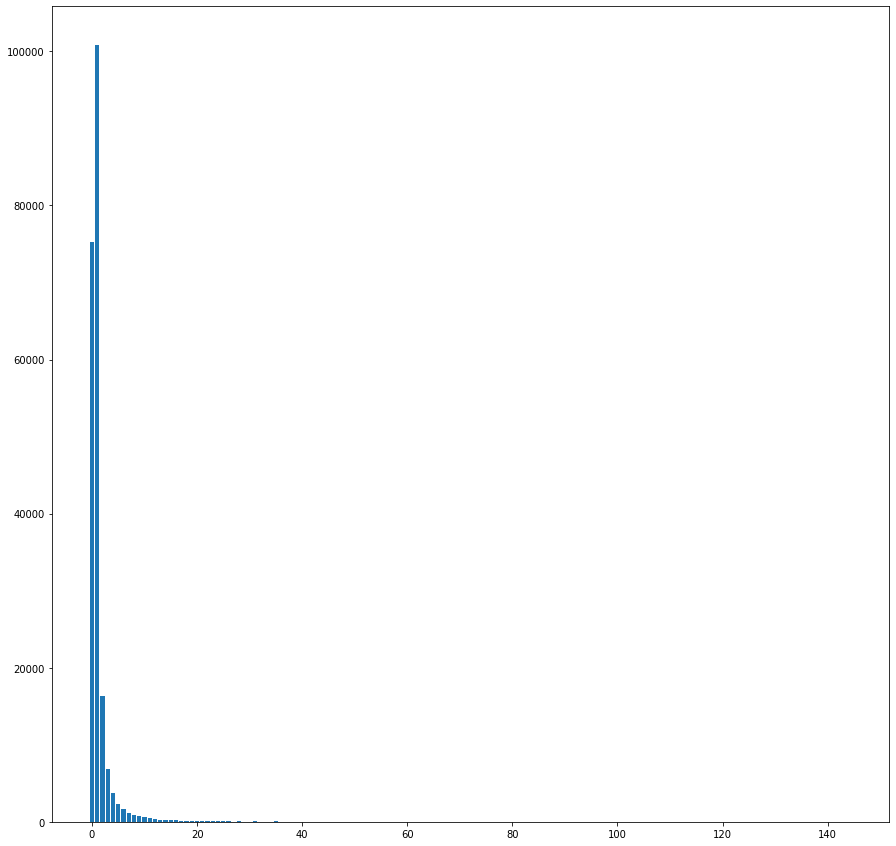

In [76]:
plt.figure(figsize=(15, 15))
plt.bar(keys, values)

<BarContainer object of 102 artists>

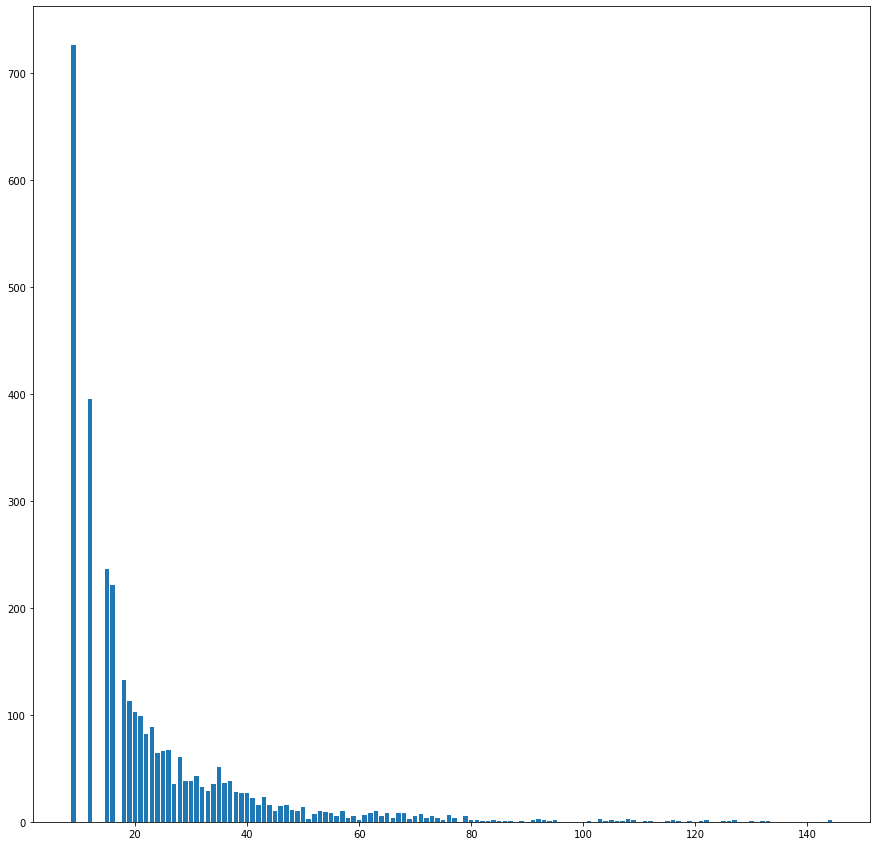

In [80]:
plt.figure(figsize=(15, 15))
plt.bar(keys[15:-1], values[15:-1])

#### function for inding patients matches and calculates the % of target

In [54]:
data = patientdata.dropna()
data

Unnamed: 0  subject_id   hadm_id            admittime  \
0                0    10000032  22595853  2180-05-06 22:23:00   
1                1    10000032  22841357  2180-06-26 18:27:00   
2                2    10000032  25742920  2180-08-05 23:44:00   
4                9    10000117  27988844  2183-09-18 18:10:00   
7               13    10000635  26134563  2136-06-19 14:24:00   
...            ...         ...       ...                  ...   
229441      431235    19999784  29355057  2119-10-17 10:28:00   
229442      431236    19999784  29889147  2120-10-25 09:43:00   
229443      431237    19999784  29956342  2121-01-31 00:00:00   
229444      431238    19999828  25744818  2149-01-08 16:44:00   
229445      431239    19999828  29734428  2147-07-18 16:23:00   

                  dischtime      admission_location       operation_date  \
0       2180-05-07 17:15:00  TRANSFER FROM HOSPITAL  2180-05-07 00:00:00   
1       2180-06-27 18:49:00          EMERGENCY ROOM  2180-06-27 00:00:00   
2       2180-08-07 17:50:00          EMERGENCY ROOM  2180-08-06 00:00:00   
4       2183-09-21 16:30:00   WALK-IN/SELF REFERRAL  2183-09-19 00:00:00   
7       2136-06-20 11:30:00          PROCEDURE SITE  2136-06-19 00:00:00   
...                     ...                     ...                  ...   
229441  2119-10-23 14:45:00      PHYSICIAN REFERRAL  2119-10-17 00:00:00   
229442  2120-10-31 09:00:00      PHYSICIAN REFERRAL  2120-10-25 00:00:00   
229443  2121-02-05 12:44:00      PHYSICIAN REFERRAL  2121-02-05 00:00:00   
229444  2149-01-18 17:00:00  TRANSFER FROM HOSPITAL  2149-01-08 00:00:00   
229445  2147-08-04 18:10:00      PHYSICIAN REFERRAL  2147-07-27 00:00:00   

       procedure_code  procedure_version diagnose_code  diagnose_version  \
0                5491                9.0          5723               9.0   
1                5491                9.0         07071               9.0   
2                5491                9.0         07054               9.0   
4             0QS734Z               10.0       S72012A              10.0   
7                3734                9.0         42789               9.0   
...               ...                ...           ...               ...   
229441        3E04305               10.0         Z5111              10.0   
229442        3E04305               10.0         Z5111              10.0   
229443        3E04305               10.0         Z5111              10.0   
229444        0J980ZZ               10.0       T8141XA              10.0   
229445        0HR7X74               10.0       T8131XA              10.0   

         BMI      BMI_categorie blood_pressure blood_pressure_categorie  \
0       18.0       ondergewicht         110/65                  normaal   
1       18.0       ondergewicht         110/65                  normaal   
2       18.0       ondergewicht         110/65                  normaal   
4       19.6            normaal         124/66      verhoogde bloeddruk   
7       31.7        overgewicht         140/86    stage1 hoge bloeddruk   
...      ...                ...            ...                      ...   
229441  23.8            normaal         129/87    stage1 hoge bloeddruk   
229442  23.8            normaal         129/87    stage1 hoge bloeddruk   
229443  23.8            normaal         129/87    stage1 hoge bloeddruk   
229444  25.7  licht overgewicht         130/88    stage1 hoge bloeddruk   
229445  25.7  licht overgewicht         130/88    stage1 hoge bloeddruk   

        leeftijd  target  
0             52   False  
1             52   False  
2             52   False  
4             48   False  
7             74   False  
...          ...     ...  
229441        57    True  
229442        57    True  
229443        57   False  
229444        46    True  
229445        46    True  

[154198 rows x 17 columns]

In [60]:

def similiar_patient_cal_tar(patient_id, features):
    data = patientdata.dropna()
    patient = data.where((data["subject_id"]==patient_id)).dropna().reset_index(drop=True).loc[0]
    

    
    for feat in features:
        if feat == 'leeftijd':
            data = data.where((patientdata[feat].isin(range(int(patient[feat]-5), int(patient[feat]+5)))))
            
        else:
            data = data.where((patientdata[feat]==patient[feat]))
    
    
    data = data.dropna()
    
    amount = len(data)
    trues = len(data.where((patientdata['target']==1)).dropna())
    
    
    print(f'patient {patient_id} has {amount} similiar patients.\n and {trues/amount*100}% of the patients has a true target')

In [61]:
similiar_patient_cal_tar(10000635, columns)

patient 10000635 has 5 similiar patients.
 and 20.0% of the patients has a true target
